In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()
os.chdir("D:/YEAR 3/Semester 1/FIT3163")

calender = pd.read_csv("calendar.csv")
validation = pd.read_csv("sales_train_validation.csv")
evaluation = pd.read_csv("sales_train_evaluation.csv")
price = pd.read_csv("sell_prices.csv")


In [2]:
evaluation['cat_id'].unique()

calender['date'] = pd.to_datetime(calender['date'])

In [3]:
price.shape
max_price = price['sell_price'].max()
min_price = price['sell_price'].min()
price.describe()
price.sort_values('sell_price')
max_index = price['sell_price'].idxmax()
min_index = price['sell_price'].idxmin()
max_store = price.loc[max_index, 'store_id']
min_store = price.loc[min_index, 'store_id']
max_item = price.loc[max_index, 'item_id']
min_item = price.loc[min_index, 'item_id']
price.loc[max_index, 'wm_yr_wk']
price.loc[min_index, 'wm_yr_wk']

11442

In [4]:
max_store_character = str(max_store)
min_store_character = str(min_store)
print("The highest price in the data is: USD", max_price, "at", max_store_character)
print("The lowest price in the data is: USD", min_price, "at", min_store_character)

The highest price in the data is: USD 107.32 at WI_3
The lowest price in the data is: USD 0.01 at CA_1


In [5]:
hobbies = evaluation[evaluation['cat_id'] == "HOBBIES"]
household = evaluation[evaluation['cat_id'] == "HOUSEHOLD"]
foods = evaluation[evaluation['cat_id'] == "FOODS"]


In [6]:

hobbies['sum_unit_sold'] = hobbies.iloc[:, 7:1947].sum(axis=1)
household['sum_unit_sold'] = household.iloc[:, 7:1947].sum(axis=1)
foods['sum_unit_sold'] = foods.iloc[:, 7:1947].sum(axis=1)


C:\Users\hp\AppData\Local\Temp\ipykernel_27404\1876086217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies['sum_unit_sold'] = hobbies.iloc[:, 7:1947].sum(axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_27404\1876086217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household['sum_unit_sold'] = household.iloc[:, 7:1947].sum(axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_27404\1876086217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [7]:
hobbies_price = price[price.apply(lambda row: 'HOBBIES' in ','.join(row.values.astype(str)), axis=1)]
household_price = price[price.apply(lambda row: 'HOUSEHOLD' in ','.join(row.values.astype(str)), axis=1)]
foods_price = price[price.apply(lambda row: 'FOODS' in ','.join(row.values.astype(str)), axis=1)]


In [8]:
hobbies.shape
household.shape
foods.shape
hobbies_price.shape
household_price.shape
foods_price.shape


(3181789, 4)

In [9]:
hobbies_clean = hobbies.drop_duplicates()
hobbies_clean = hobbies_clean.dropna()
household_clean = household.drop_duplicates()
household_clean = household_clean.dropna()
foods_clean = foods.drop_duplicates()
foods_clean = foods_clean.dropna()
hobbies_price_clean = hobbies_price.drop_duplicates()
hobbies_price_clean = hobbies_price_clean.dropna()
household_price_clean = household_price.drop_duplicates()
household_price_clean = household_price_clean.dropna()
foods_price_clean = foods_price.drop_duplicates()
foods_price_clean = foods_price_clean.dropna()

In [10]:
hobbies_clean.shape
household_clean.shape
foods_clean.shape
hobbies_price_clean.shape
household_price_clean.shape
foods_price_clean.shape

(3181789, 4)

In [11]:
ttest_ind(hobbies_price['sell_price'], household_price['sell_price'])
ttest_ind(hobbies_price['sell_price'], foods_price['sell_price'])
ttest_ind(household_price['sell_price'], foods_price['sell_price'])

ttest_ind(hobbies['sum_unit_sold'], household['sum_unit_sold'])
ttest_ind(hobbies['sum_unit_sold'], foods['sum_unit_sold'])
ttest_ind(household['sum_unit_sold'], foods['sum_unit_sold'])


Ttest_indResult(statistic=-24.44246864317065, pvalue=2.1022064278019526e-130)

In [12]:

# hobbies_list = hobbies_price['item_id'].unique()
# for i in hobbies_list:
#     print("Mean", i, "=", hobbies_price[hobbies_price['item_id'] == i]['sell_price'].mean())

np.random.seed(3164)

n = 5000


In [13]:
np.random.seed(3164)
sampled_hobbies = hobbies.sample(n)
sampled_household = household.sample(n)
sampled_foods = foods.sample(n, replace=False)

In [14]:
hobbies_merge = pd.merge(hobbies_price, calender, on="wm_yr_wk")
household_merge = pd.merge(household_price, calender, on="wm_yr_wk")
foods_merge = pd.merge(foods_price, calender, on="wm_yr_wk")
m = 5000

In [15]:
np.random.seed(3164)
hobbies_merge_sampling = hobbies_merge.sample(m, replace=False)

household_merge_sampling = household_merge.sample(m, replace=False)

foods_merge_sampling = foods_merge.sample(m, replace=False)
hobbies_merge = pd.merge(sampled_hobbies, hobbies_merge_sampling, on="item_id")
household_merge = pd.merge(sampled_household, household_merge_sampling, on="item_id")
foods_merge = pd.merge(sampled_foods, foods_merge_sampling, on="item_id")
x = np.arange(min(hobbies_merge["sell_price"]), max(hobbies_merge["sell_price"]), 1)
y = hobbies_merge["sum_unit_sold"]

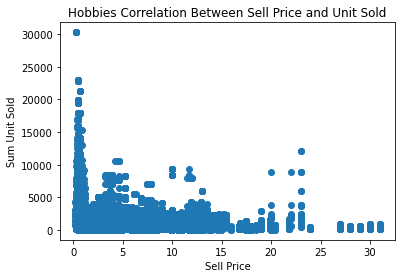

In [16]:
plt.scatter(hobbies_merge["sell_price"], hobbies_merge["sum_unit_sold"])
plt.title("Hobbies Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

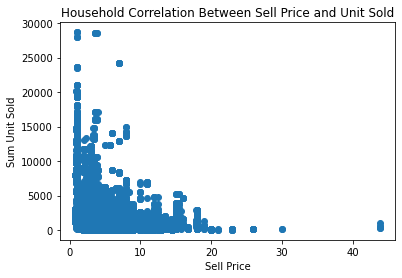

In [17]:


plt.scatter(household_merge["sell_price"], household_merge["sum_unit_sold"])
plt.title("Household Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

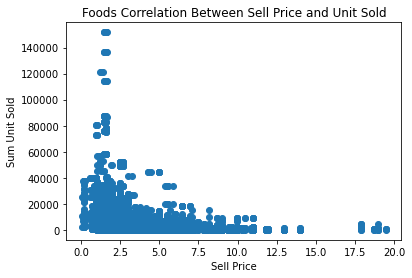

In [18]:
plt.scatter(foods_merge["sell_price"], foods_merge["sum_unit_sold"])
plt.title("Foods Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

In [19]:


hobbies_total_sales = hobbies_merge["sum_unit_sold"] * hobbies_merge["sell_price"]
hobbies_merge["sales"] = hobbies_total_sales
household_total_sales = household_merge["sum_unit_sold"] * household_merge["sell_price"]
household_merge["sales"] = household_total_sales
foods_total_sales = foods_merge["sum_unit_sold"] * foods_merge["sell_price"]
foods_merge["sales"] = foods_total_sales

hobbies_viz = hobbies_merge[["id","state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date","event_type_1"]]
household_viz = household_merge[["id","state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date","event_type_1"]]
foods_viz = foods_merge[["id","state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date", "event_type_1"]]
my_data = pd.concat([hobbies_viz, household_viz, foods_viz])
my_data.columns = ["id","state_id", "dept_id", "cat_id", "sell_price", "revenue", "sales_volume", "date", "event_type_1"]



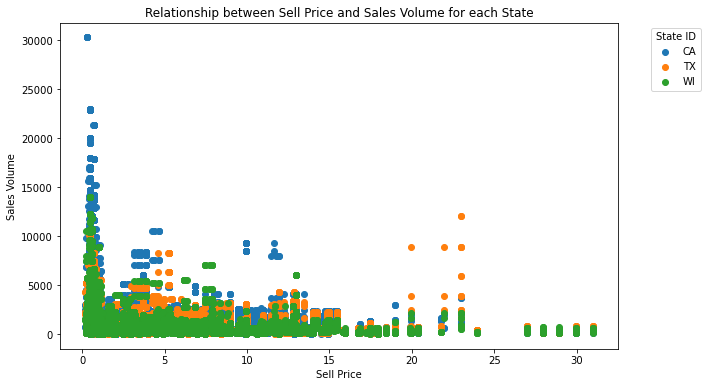

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for states
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map state_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(hobbies_merge['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in hobbies_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




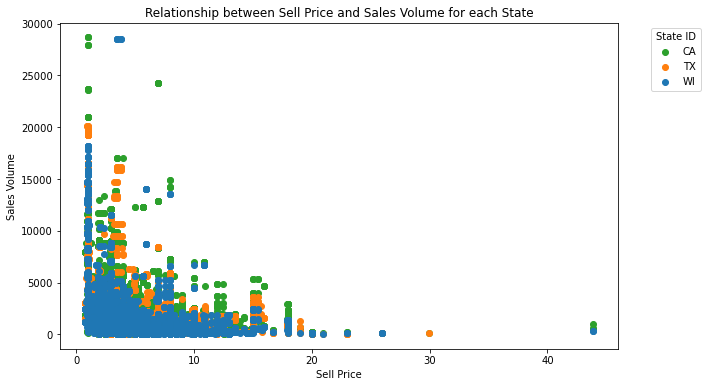

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for states
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map state_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(household_merge['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in household_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


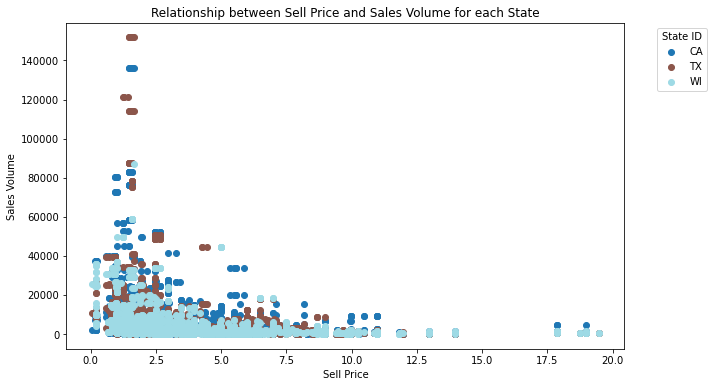

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique state_ids and assign a color to each
state_ids = foods_merge['state_id'].unique()
num_states = len(state_ids)
colors = plt.cm.get_cmap('tab20', num_states)

# Map state_id to color
state_color_map = {state_id: colors(i) for i, state_id in enumerate(state_ids)}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in foods_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=state_color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


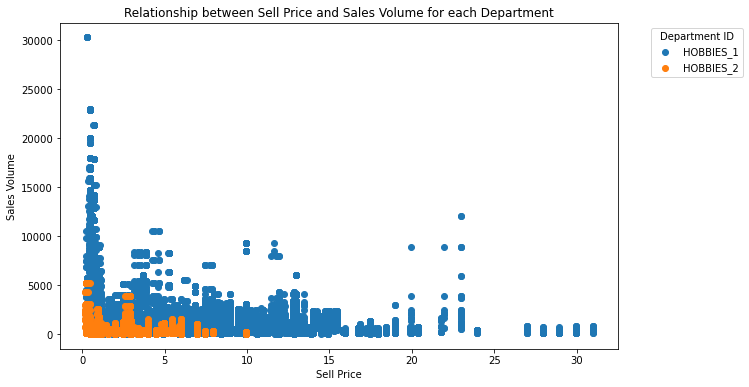

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(hobbies_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in hobbies_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


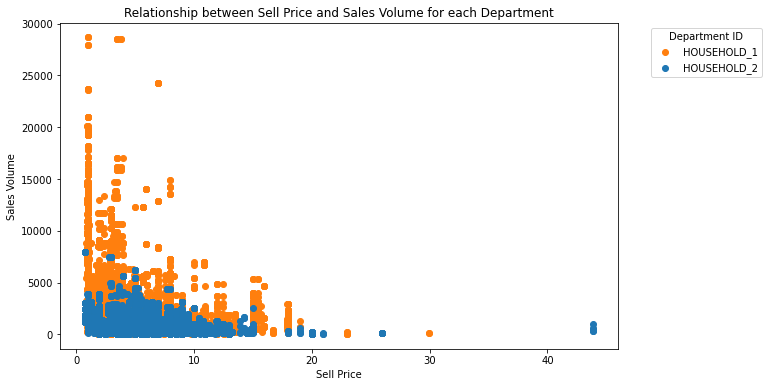

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(household_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in household_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



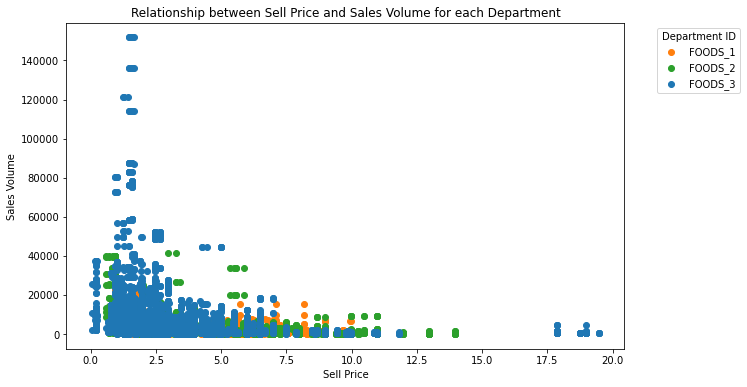

In [25]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(foods_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in foods_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


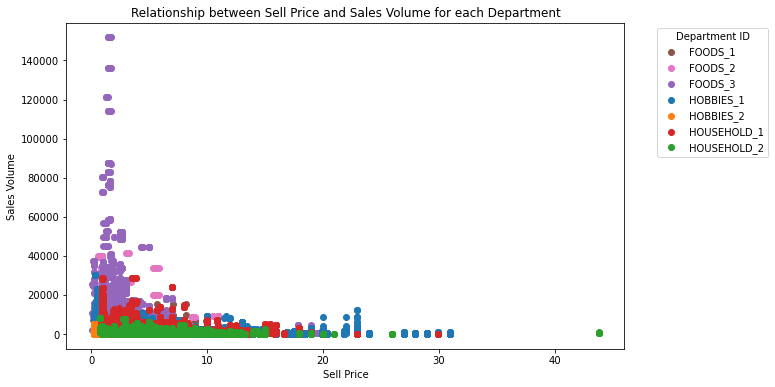

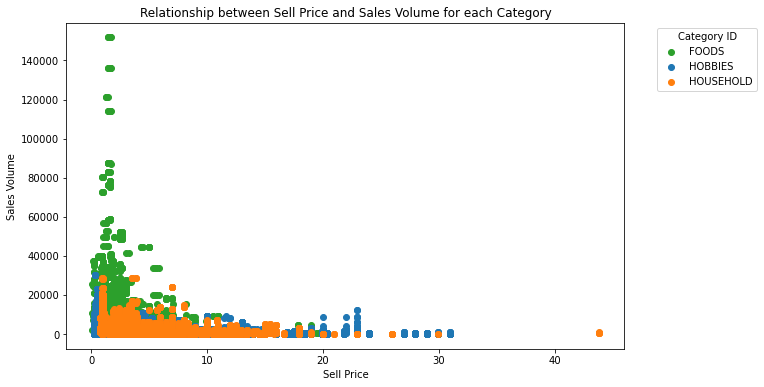

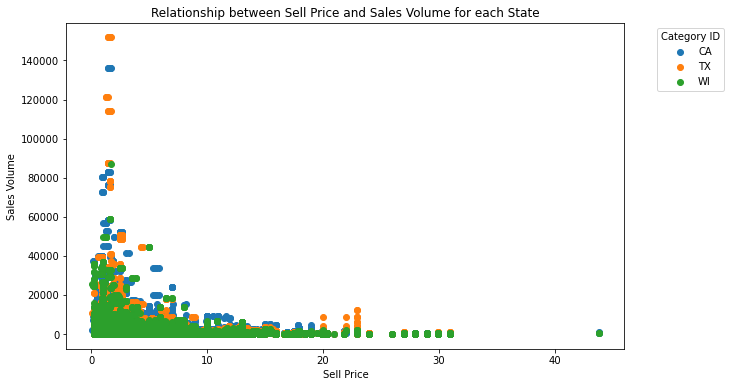

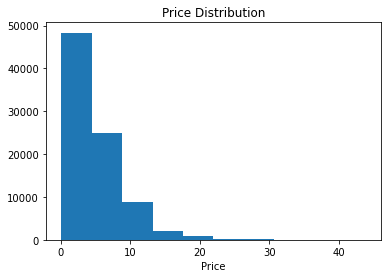

In [26]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(my_data['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in my_data.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Define a list of colors for category
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map cat_id to colors
color_map = {cat_id: colors[i % len(colors)] for i, cat_id in enumerate(my_data['cat_id'].unique())}

# Create a scatter plot with different colors for each category
plt.figure(figsize=(10, 6))
for cat_id, group in my_data.groupby('cat_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=cat_id, color=color_map[cat_id])

plt.title("Relationship between Sell Price and Sales Volume for each Category")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Define a list of colors for state
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map cat_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(my_data['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in my_data.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Summary statistics of my_data
my_data.describe()

# Histogram of Price Distribution
plt.hist(my_data['sell_price'])
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()



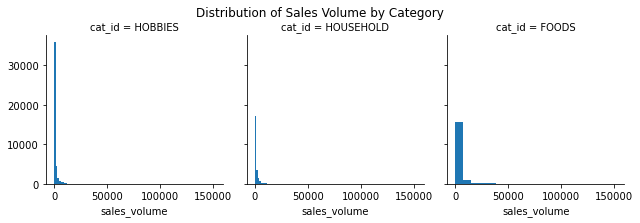

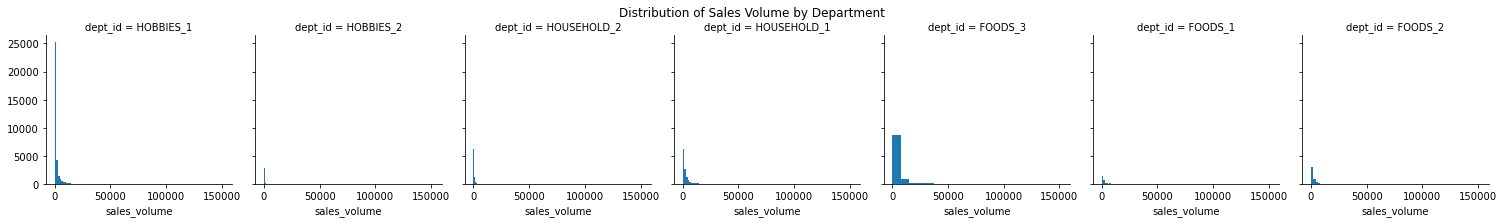

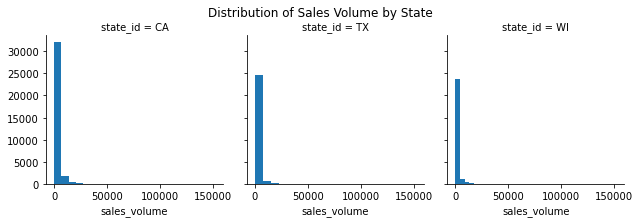

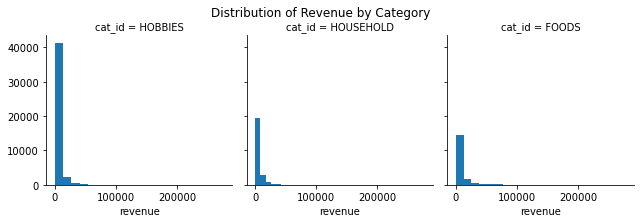

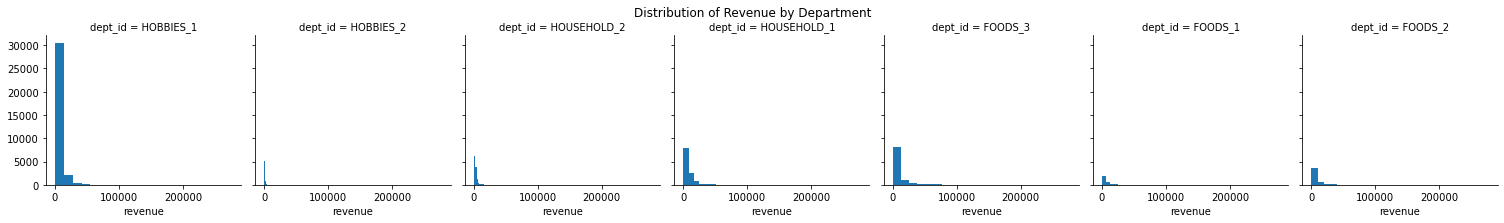

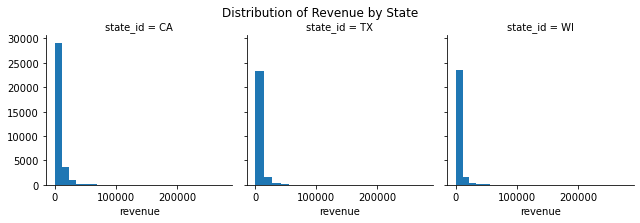

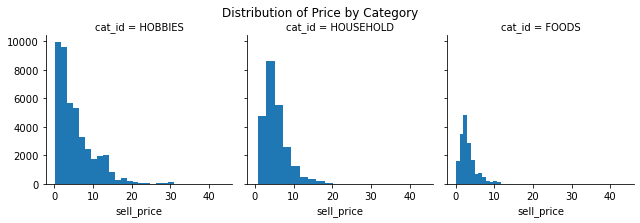

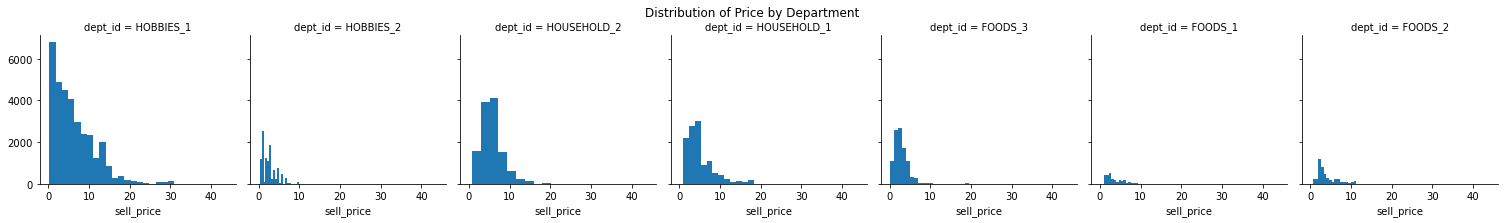

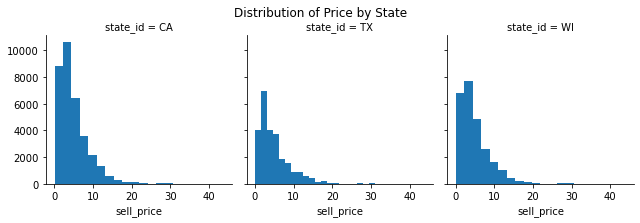

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sales Volume by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by Category", y=1.02)

# Distribution of Sales Volume by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by Department", y=1.02)

# Distribution of Sales Volume by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by State", y=1.02)

# Distribution of Revenue by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by Category", y=1.02)

# Distribution of Revenue by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by Department", y=1.02)

# Distribution of Revenue by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by State", y=1.02)

# Distribution of Price by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by Category", y=1.02)

# Distribution of Price by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by Department", y=1.02)

# Distribution of Price by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by State", y=1.02)

plt.show()


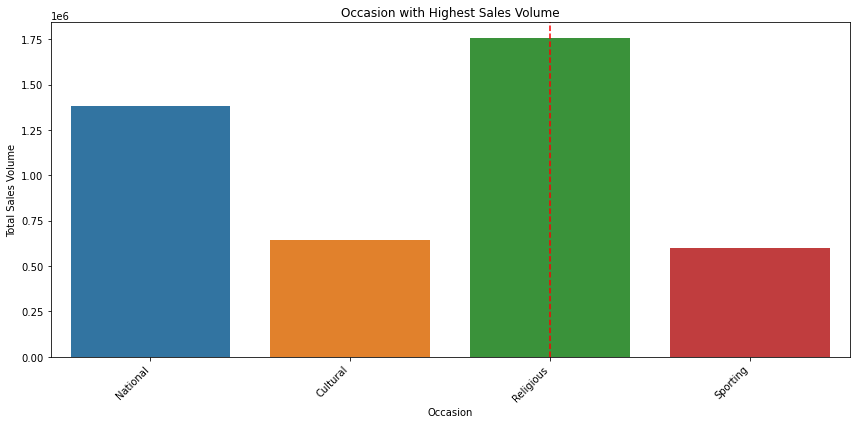

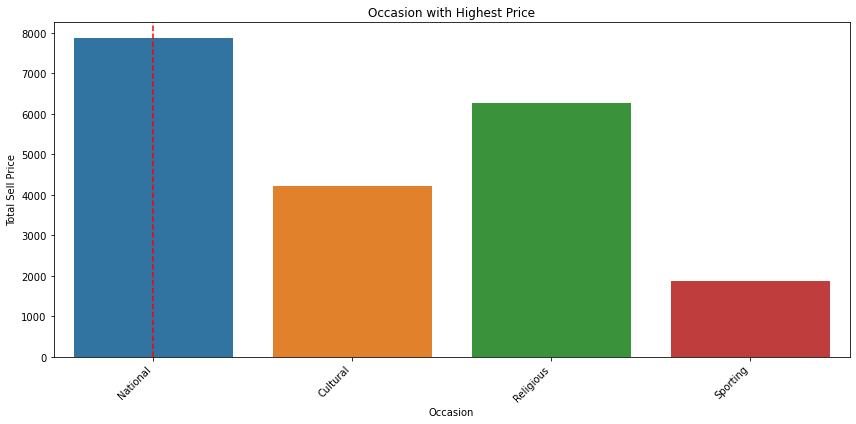

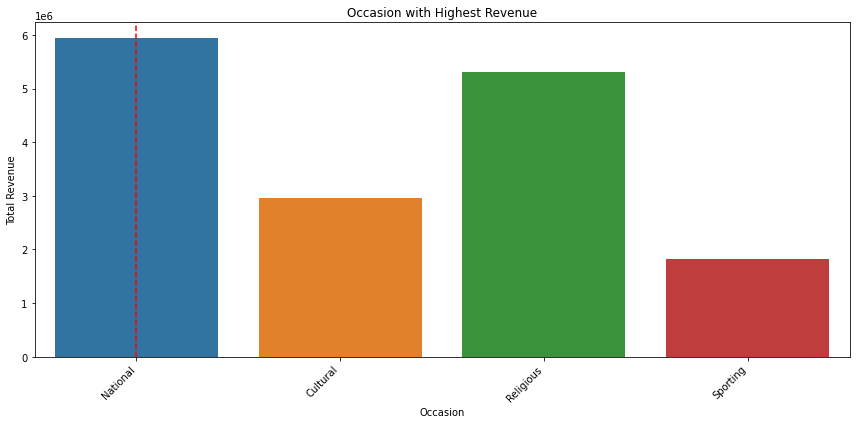

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

max_occasion_hobbies = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sum_unit_sold', data=hobbies_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Sales Volume')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')

# Find the index of the occasion with the highest sales volume
max_occasion_index = hobbies_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_hobbies)

# Add a vertical line for the occasion with the highest sales volume
plt.axvline(x=max_occasion_index, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

max_occasion_price_hobbies = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sell_price', data=hobbies_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Price')
plt.xlabel('Occasion')
plt.ylabel('Total Sell Price')

max_occasion_index_price = hobbies_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_price_hobbies)

# Add a vertical line for the occasion with the highest price
plt.axvline(x=max_occasion_index_price, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find occasion with highest revenue
max_occasion_revenue_hobbies = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sales', data=hobbies_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Revenue')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')

max_occasion_index_revenue = hobbies_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_revenue_hobbies)

# Add a vertical line for the occasion with the highest revenue
plt.axvline(x=max_occasion_index_revenue, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
max_occasion_revenue_hobbies

'National'

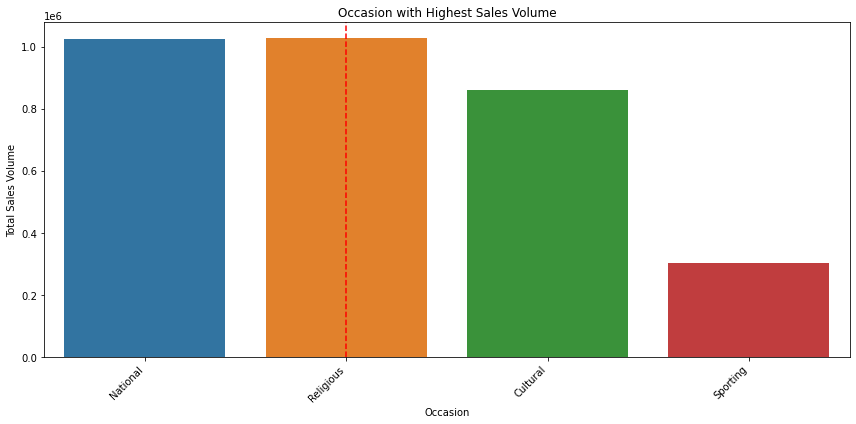

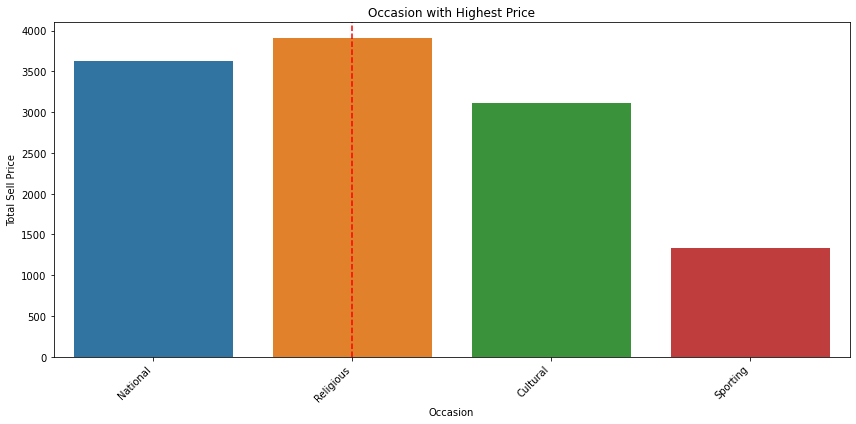

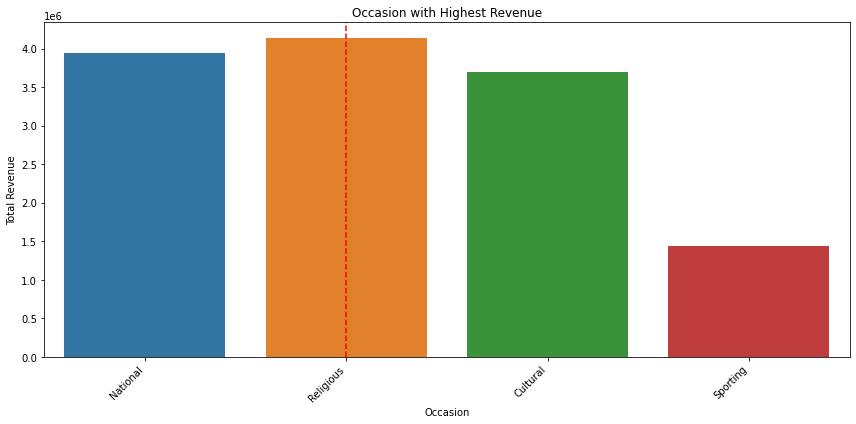

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

max_occasion_household = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sum_unit_sold', data=household_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Sales Volume')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')

max_occasion_index_household = household_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_household)

# Add a vertical line for the occasion with the highest sales volume
plt.axvline(x=max_occasion_index_household, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

max_occasion_price_household = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sell_price', data=household_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Price')
plt.xlabel('Occasion')
plt.ylabel('Total Sell Price')

max_occasion_index_price = household_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_price_household)

# Add a vertical line for the occasion with the highest price
plt.axvline(x=max_occasion_index_price, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find occasion with highest revenue
max_occasion_revenue_household = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sales', data=household_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Revenue')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')

max_occasion_index_revenue = household_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_revenue_household)


# Add a vertical line for the occasion with the highest revenue
plt.axvline(x=max_occasion_index_revenue, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

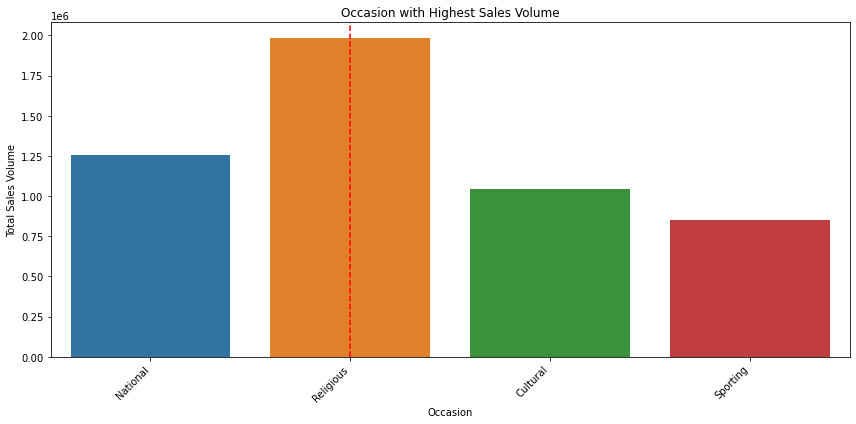

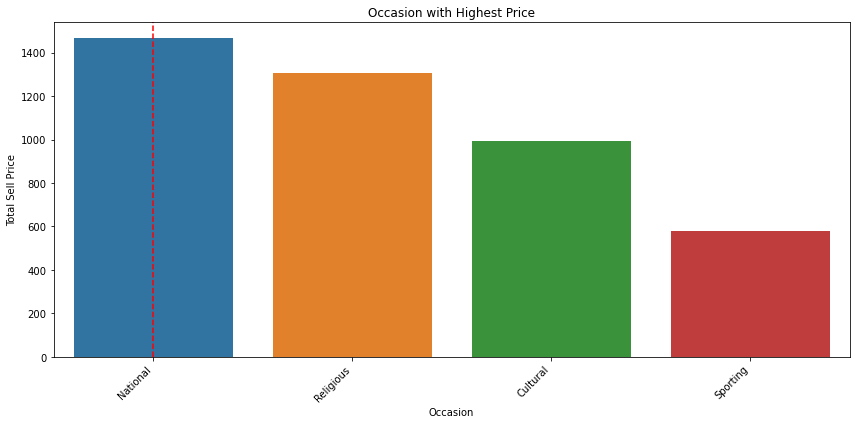

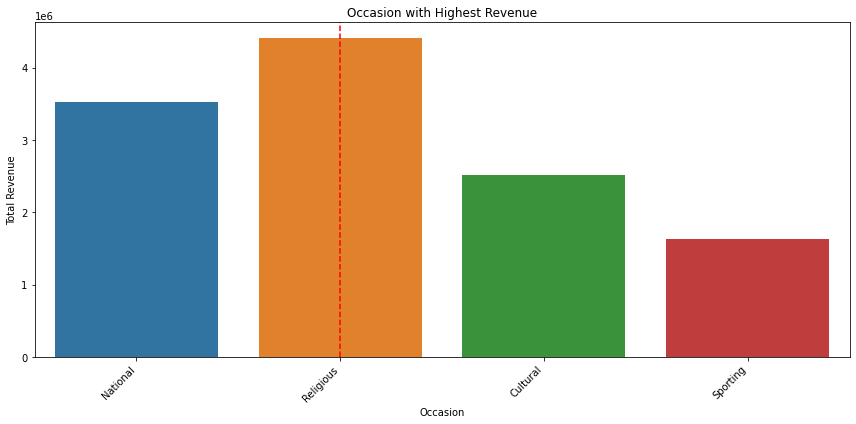

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns

max_occasion_foods = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sum_unit_sold', data=foods_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Sales Volume')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')

max_occasion_index_foods = foods_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_foods)

# Add a vertical line for the occasion with the highest sales volume
plt.axvline(x=max_occasion_index_foods, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

max_occasion_price_foods = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sell_price', data=foods_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Price')
plt.xlabel('Occasion')
plt.ylabel('Total Sell Price')

max_occasion_index_price = foods_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_price_foods)

# Add a vertical line for the occasion with the highest price
plt.axvline(x=max_occasion_index_price, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Find occasion with highest revenue
max_occasion_revenue_foods = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sales', data=foods_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Revenue')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')

max_occasion_index_revenue = foods_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_revenue_foods)

# Add a vertical line for the occasion with the highest revenue
plt.axvline(x=max_occasion_index_revenue, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

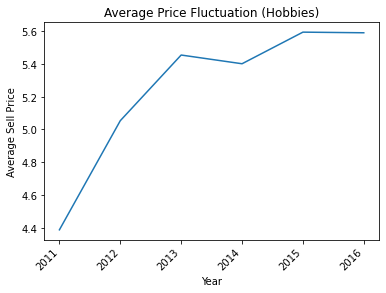

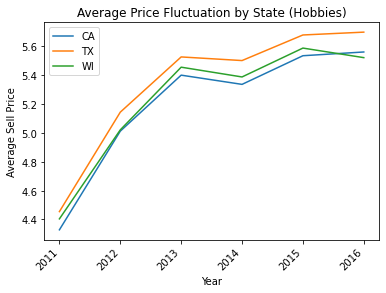

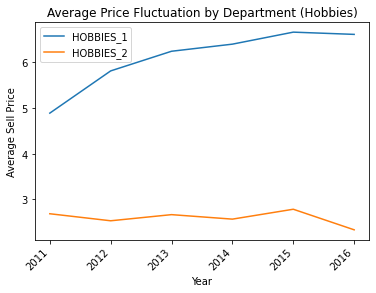

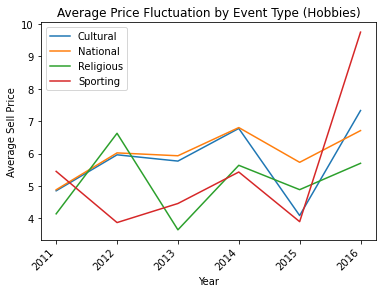

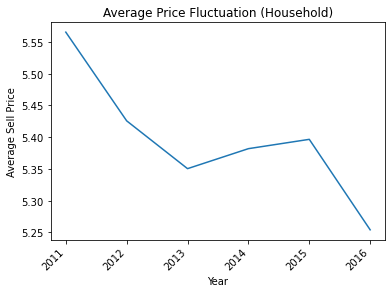

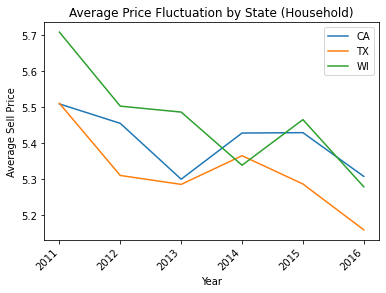

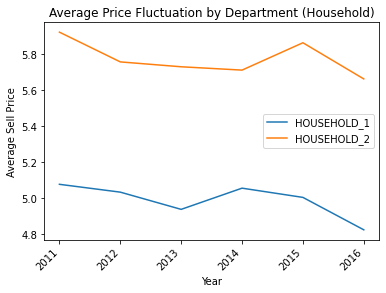

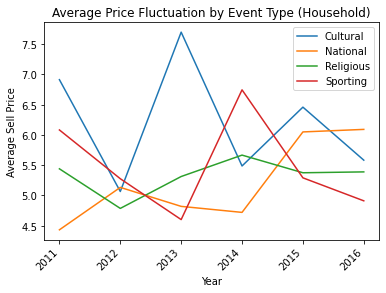

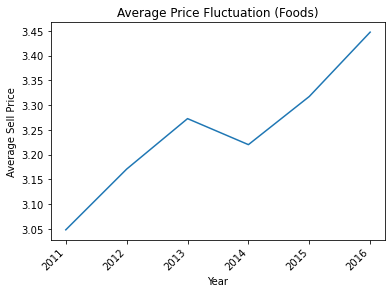

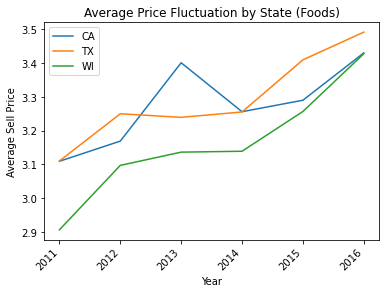

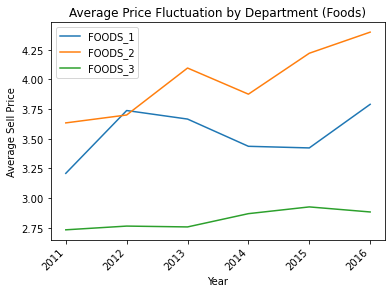

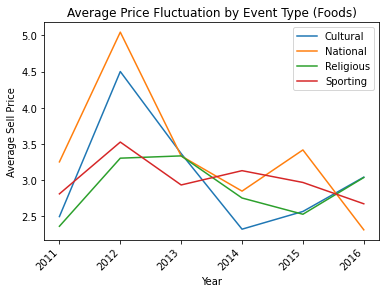

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# average_prices (hobbies_merge)
average_prices = hobbies_merge.groupby('year')['sell_price'].mean().reset_index()

plt.figure()
plt.plot(average_prices['year'], average_prices['sell_price'])
plt.title('Average Price Fluctuation (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# average_prices (hobbies_merge) by state_id
average_prices = hobbies_merge.groupby(['state_id', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for state_id in average_prices['state_id'].unique():
    plt.plot(average_prices[average_prices['state_id'] == state_id]['year'], average_prices[average_prices['state_id'] == state_id]['sell_price'], label=state_id)
plt.title('Average Price Fluctuation by State (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# average_prices (hobbies_merge) by dept_id
average_prices = hobbies_merge.groupby(['dept_id', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for dept_id in average_prices['dept_id'].unique():
    plt.plot(average_prices[average_prices['dept_id'] == dept_id]['year'], average_prices[average_prices['dept_id'] == dept_id]['sell_price'], label=dept_id)
plt.title('Average Price Fluctuation by Department (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# average_prices (hobbies_merge) by event_type_1
average_prices = hobbies_merge.groupby(['event_type_1', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for event_type_1 in average_prices['event_type_1'].unique():
    plt.plot(average_prices[average_prices['event_type_1'] == event_type_1]['year'], average_prices[average_prices['event_type_1'] == event_type_1]['sell_price'], label=event_type_1)
plt.title('Average Price Fluctuation by Event Type (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation (Household)
average_prices = household_merge.groupby('year').agg(avg_sell_price=('sell_price', 'mean')).reset_index()

plt.plot(average_prices['year'], average_prices['avg_sell_price'])
plt.title("Average Price Fluctuation (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.show()

# Average Price Fluctuation by State (Household)
average_prices = household_merge.groupby(['state_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for state_id in average_prices['state_id'].unique():
    data = average_prices[average_prices['state_id'] == state_id]
    plt.plot(data['year'], data['avg_sell_price'], label=state_id)

plt.title("Average Price Fluctuation by State (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Department (Household)
average_prices = household_merge.groupby(['dept_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for dept_id in average_prices['dept_id'].unique():
    data = average_prices[average_prices['dept_id'] == dept_id]
    plt.plot(data['year'], data['avg_sell_price'], label=dept_id)

plt.title("Average Price Fluctuation by Department (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Event Type (Household)
average_prices = household_merge.groupby(['event_type_1', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for event_type_1 in average_prices['event_type_1'].unique():
    data = average_prices[average_prices['event_type_1'] == event_type_1]
    plt.plot(data['year'], data['avg_sell_price'], label=event_type_1)

plt.title("Average Price Fluctuation by Event Type (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation (Foods)
average_prices = foods_merge.groupby('year').agg(avg_sell_price=('sell_price', 'mean')).reset_index()

plt.plot(average_prices['year'], average_prices['avg_sell_price'])
plt.title("Average Price Fluctuation (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.show()

# Average Price Fluctuation by State (Foods)
average_prices = foods_merge.groupby(['state_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for state_id in average_prices['state_id'].unique():
    data = average_prices[average_prices['state_id'] == state_id]
    plt.plot(data['year'], data['avg_sell_price'], label=state_id)

plt.title("Average Price Fluctuation by State (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Department (Foods)
average_prices = foods_merge.groupby(['dept_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for dept_id in average_prices['dept_id'].unique():
    data = average_prices[average_prices['dept_id'] == dept_id]
    plt.plot(data['year'], data['avg_sell_price'], label=dept_id)

plt.title("Average Price Fluctuation by Department (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Event Type (Foods)
average_prices = foods_merge.groupby(['event_type_1', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for event_type_1 in average_prices['event_type_1'].unique():
    data = average_prices[average_prices['event_type_1'] == event_type_1]
    plt.plot(data['year'], data['avg_sell_price'], label=event_type_1)

plt.title("Average Price Fluctuation by Event Type (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()



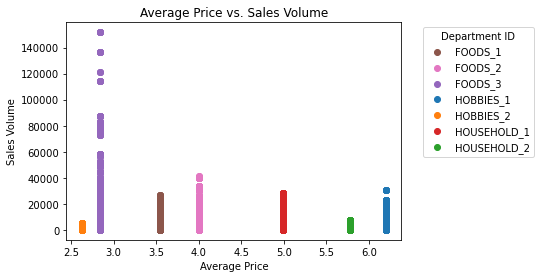

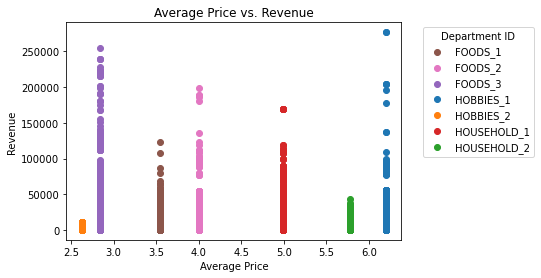

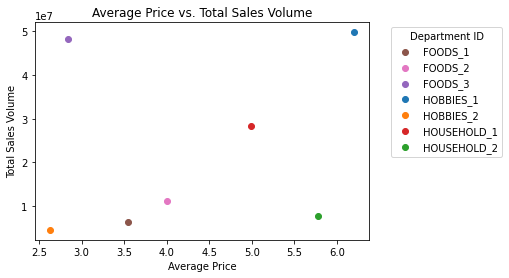

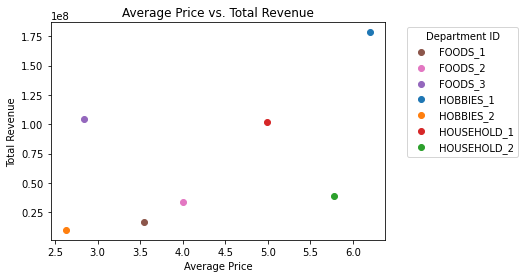

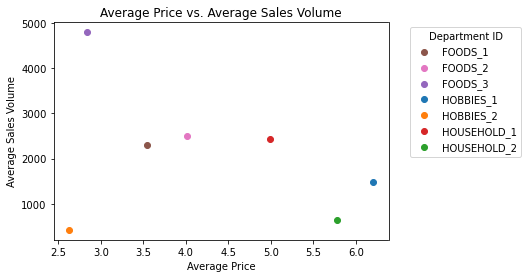

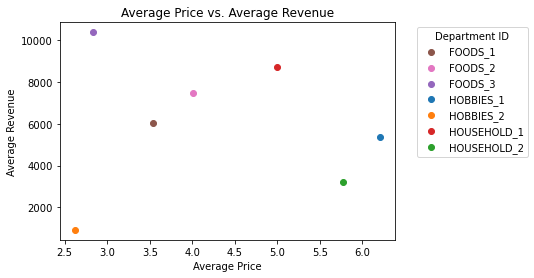

In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(my_data['dept_id'].unique())}

my_data['avg_price'] = my_data.groupby('dept_id')['sell_price'].transform('mean')

# Average Price vs. Sales Volume
plt.figure()
for dept_id, group in my_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['sales_volume'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Revenue
plt.figure()
for dept_id, group in my_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['revenue'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Revenue")
plt.xlabel("Average Price")
plt.ylabel("Revenue")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Total Sales Volume
summary_data = my_data.groupby('dept_id').agg(total_sales_volume=('sales_volume', 'sum'),
                                              total_revenue=('revenue', 'sum'),
                                              avg_price=('sell_price', 'mean')).reset_index()
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['total_sales_volume'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Total Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Total Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Total Revenue
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['total_revenue'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Total Revenue")
plt.xlabel("Average Price")
plt.ylabel("Total Revenue")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Average Sales Volume
summary_data = my_data.groupby('dept_id').agg(avg_sales_volume=('sales_volume', 'mean'),
                                              avg_revenue=('revenue', 'mean'),
                                              avg_price=('sell_price', 'mean')).reset_index()
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['avg_sales_volume'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Average Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Average Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Average Revenue
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['avg_revenue'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Average Revenue")
plt.xlabel("Average Price")
plt.ylabel("Average Revenue")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


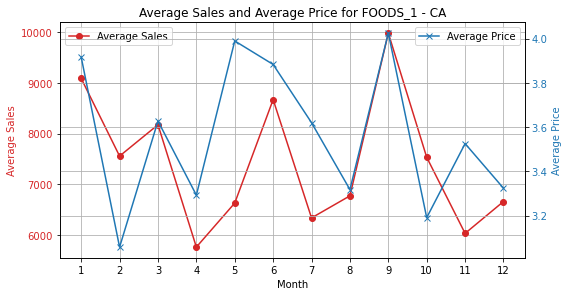

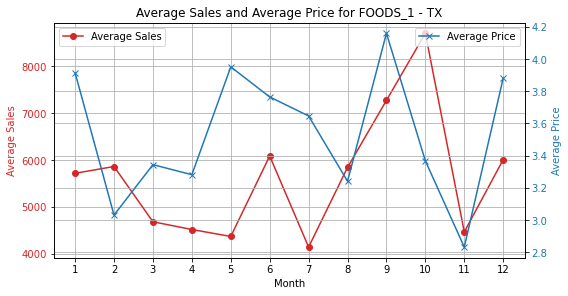

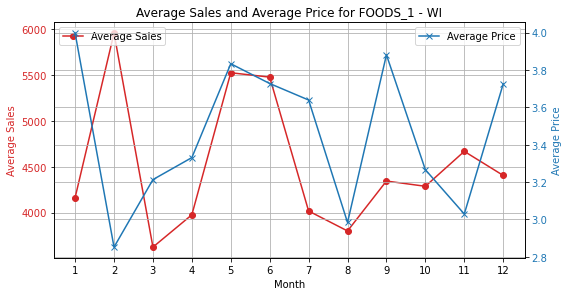

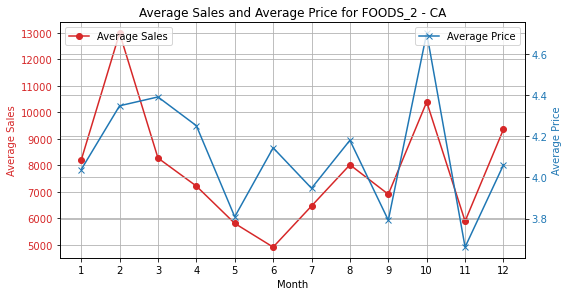

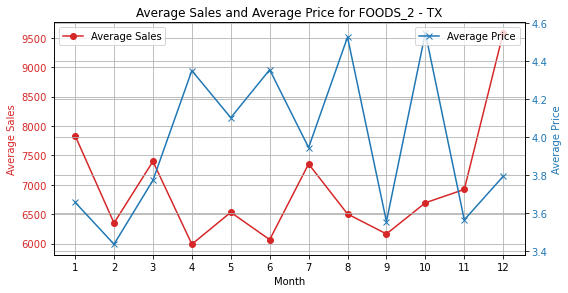

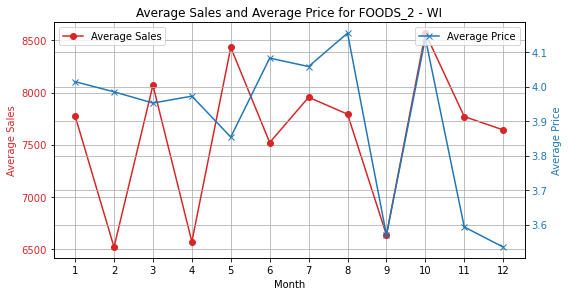

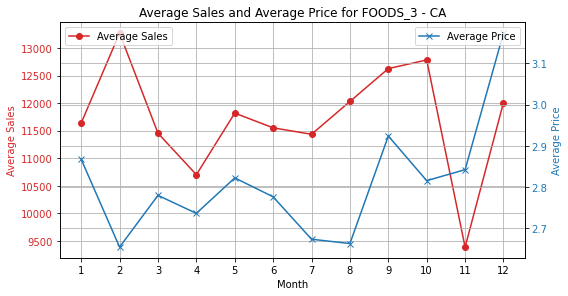

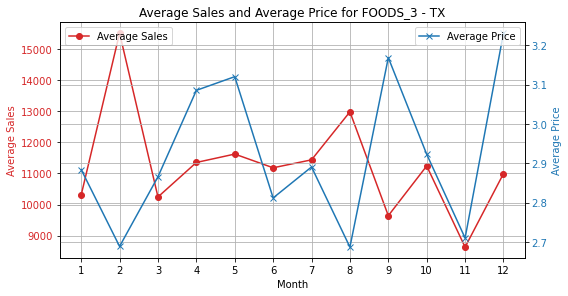

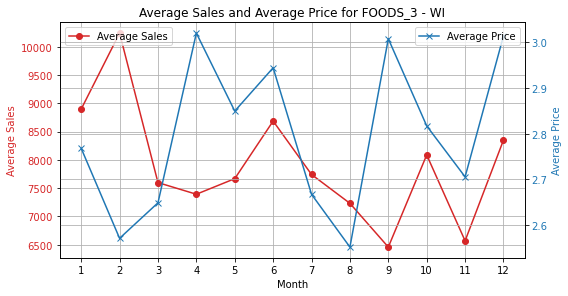

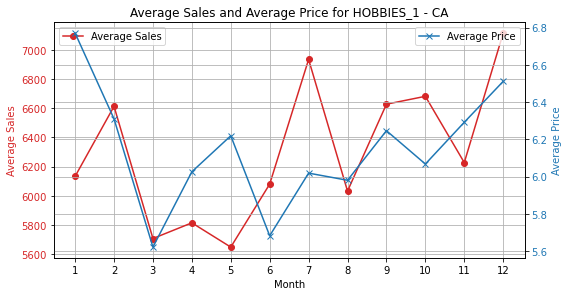

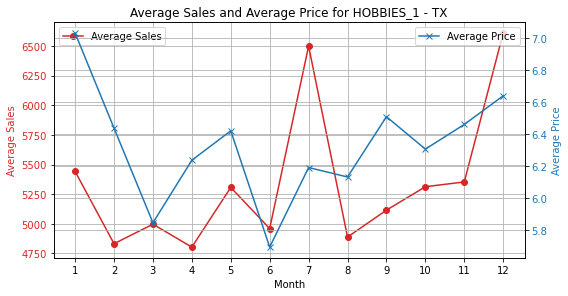

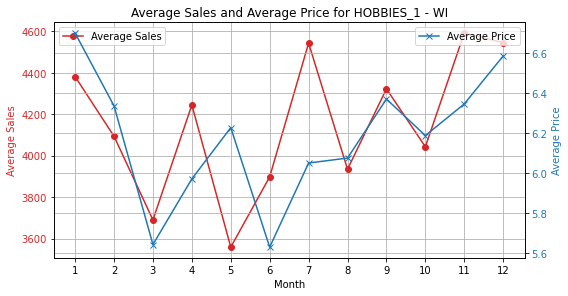

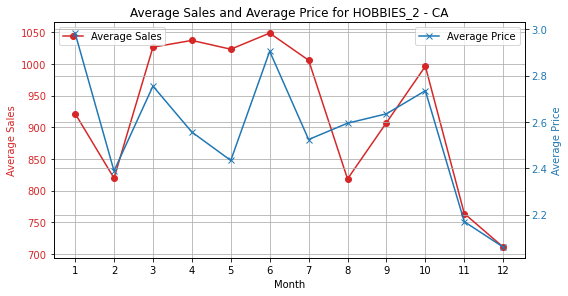

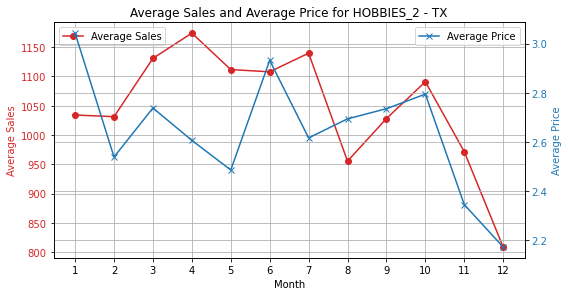

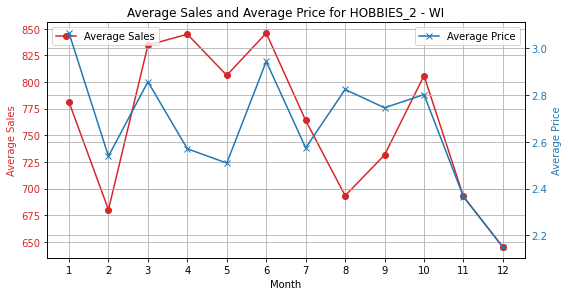

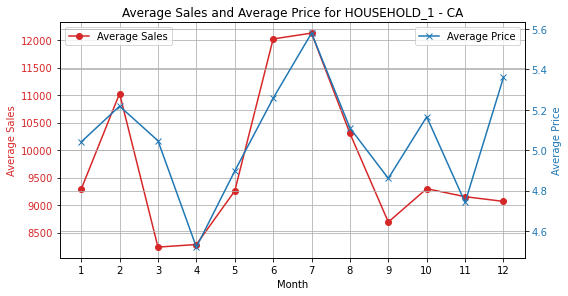

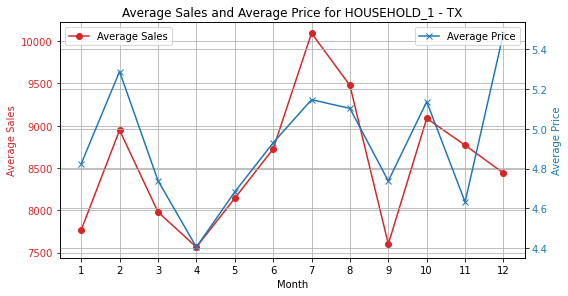

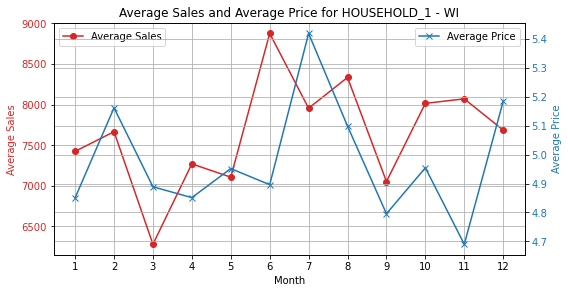

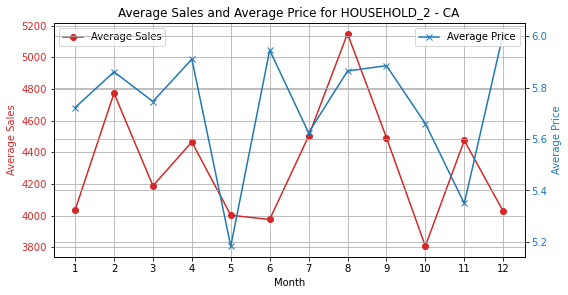

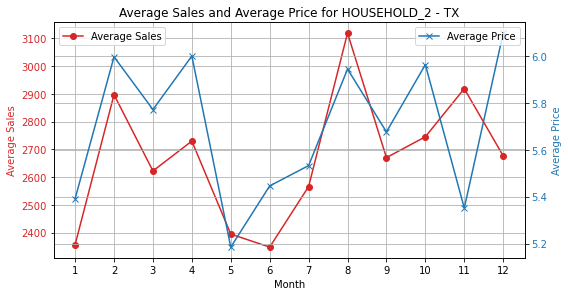

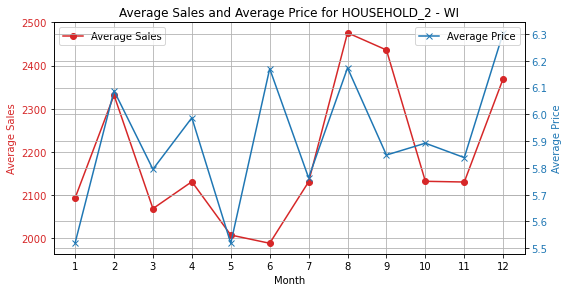

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

my_data['date'] = pd.to_datetime(my_data['date'])
my_data['month'] = my_data['date'].dt.month

# Group by department, state, and month and calculate the average sales and average price
grouped_data = my_data.groupby(['dept_id', 'state_id', 'month']).agg({'revenue': 'mean', 'sell_price': 'mean'}).reset_index()

# Get unique department-state combinations
department_states = grouped_data[['dept_id', 'state_id']].drop_duplicates()

# Plotting for each department-state combination
for i, row in department_states.iterrows():
    dept_id, state_id = row['dept_id'], row['state_id']
    data = grouped_data[(grouped_data['dept_id'] == dept_id) & (grouped_data['state_id'] == state_id)]

    fig, ax1 = plt.subplots(figsize=(8, 4))
    color = 'tab:red'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Sales', color=color)
    ax1.plot(data['month'], data['revenue'], color=color, marker='o', label='Average Sales')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Average Price', color=color)
    ax2.plot(data['month'], data['sell_price'], color=color, marker='x', label='Average Price')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(True)
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.title(f'Average Sales and Average Price for {dept_id} - {state_id}')
    plt.xticks(range(1, 13))  # months are from 1 to 12
    plt.show()


In [35]:
my_data.columns

Index(['id', 'state_id', 'dept_id', 'cat_id', 'sell_price', 'revenue',
       'sales_volume', 'date', 'event_type_1', 'avg_price', 'month'],
      dtype='object')

In [36]:
my_data['year'] = my_data['date'].dt.year
my_data['month'] = my_data['date'].dt.month

In [37]:
monthly_sale = my_data.groupby(['year','month'])['sales_volume'].sum().reset_index()


In [38]:
monthly_sale

year  month  sales_volume
0   2011      1        155024
1   2011      2       1468133
2   2011      3       1379424
3   2011      4       1616951
4   2011      5       2344546
..   ...    ...           ...
61  2016      2       2239211
62  2016      3       2980998
63  2016      4       3229734
64  2016      5       2168326
65  2016      6       1633394

[66 rows x 3 columns]

In [39]:
my_data.columns

Index(['id', 'state_id', 'dept_id', 'cat_id', 'sell_price', 'revenue',
       'sales_volume', 'date', 'event_type_1', 'avg_price', 'month', 'year'],
      dtype='object')

In [40]:
my_data = my_data.sort_values("date")

In [41]:
my_data['event_type_1'] =my_data['event_type_1'].fillna('No Event')


In [42]:
my_data.to_csv("data.csv")

In [43]:
# timestamp_var = "week_ending_sunday"
# baseline_dep_var = "ln_sales"
# changepoint_prior_scale_value = 0.3
# list_ind_vars_baseline = ['event_type_1_Cultural','event_type_1_National','event_type_1_Religious','event_type_1_Sporting']

In [44]:
# import pandas as pd
# from fbprophet import Prophet
# import matplotlib.pyplot as plt

# # Preparing the datasecloset
# my_data = my_data.rename(columns={timestamp_var: 'ds', baseline_dep_var: 'y'})
# my_data['ds'] = pd.to_datetime(my_data['ds'])

# # Initializing and fitting the model
# model = Prophet(changepoint_prior_scale= changepoint_prior_scale_value) #Default changepoint_prior_scale = 0.05

# # Add the regressor variables to the model

# for regressor in list_ind_vars_baseline:
#     model.add_regressor(regressor)
# model.fit(my_data)

# # Since we are only decomposing current time series, we will use same data is forecasting that was used for modelling
# # Making predictions and extracting the level component
# forecast = model.predict(my_data)
# level_component = forecast['trend']

In [45]:
# # Preparing the matrix to feed into optimization algorithm
# x = my_data
# x["intercept"] = 1
# x = x[["intercept","ln_sell_price","ln_base_sales"]].values.T
# # x_t = x.T

# actuals = x[2]

In [46]:
# from scipy.optimize import minimize

# # Define the objective function to be minimized
# def objective(x0):
#     return sum(((x[0]*x0[0] + x[1]*x0[1]) - actuals)**2) # (intercept*1 + elasticity*(ln_sell_price) -ln_base_sales)^2
 
# # Define the initial guess
# x0 = [1, -1]

# # Define the bounds for the variables
# bounds = ((None, None), (-3,-0.5))

# # Use the SLSQP optimization algorithm to minimize the objective function
# result = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')

# # Print the optimization result
# print(result)

# # Saving the price elastitcity of an item in the dataframe
# price_elasticity = result.x[1]
# my_data["price_elasticity"] = result.x[1]

Price Elasticity Modelling

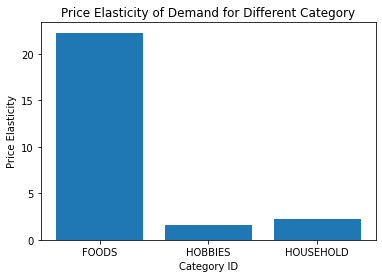

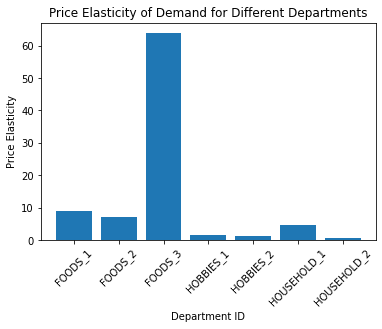

In [47]:
# Price Elasticity of Demand for Different Category
my_data = my_data.sort_values('date').reset_index(drop=True)
my_data['quantity_change'] = my_data['sales_volume'] / my_data['sales_volume'].shift(1) - 1
my_data['price_change'] = my_data['sell_price'] / my_data['sell_price'].shift(1) - 1

price_elasticity_cat = my_data.groupby('cat_id').apply(lambda x: x['quantity_change'].sum() / x['price_change'].sum()).reset_index(name='price_elasticity')

plt.bar(price_elasticity_cat['cat_id'], price_elasticity_cat['price_elasticity'])
plt.title("Price Elasticity of Demand for Different Category")
plt.xlabel("Category ID")
plt.ylabel("Price Elasticity")
plt.show()

# Price Elasticity of Demand for Different Departments
price_elasticity_dept = my_data.groupby('dept_id').apply(lambda x: x['quantity_change'].sum() / x['price_change'].sum()).reset_index(name='price_elasticity')

plt.bar(price_elasticity_dept['dept_id'], price_elasticity_dept['price_elasticity'])
plt.title("Price Elasticity of Demand for Different Departments")
plt.xlabel("Department ID")
plt.ylabel("Price Elasticity")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


In [48]:
import pandas as pd
import statsmodels.api as sm

my_data = my_data.dropna(subset=['sell_price', 'quantity_change'])

X = my_data[['sell_price']]
y = my_data['quantity_change']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

price_coefficient = model.params['sell_price']

price_elasticity = price_coefficient * (my_data['sell_price'].mean() / my_data['quantity_change'].mean())

print(f"Price Elasticity of Demand: {price_elasticity}")


X = my_data[['sell_price']]
y = my_data['sales_volume']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

intercept = model.params['const']
slope = model.params['sell_price']

price_elasticity = slope * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print(f"Price Elasticity of Demand: {price_elasticity}")




                            OLS Regression Results                            
Dep. Variable:        quantity_change   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     881.6
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          9.32e-193
Time:                        18:36:32   Log-Likelihood:            -3.5997e+05
No. Observations:               85460   AIC:                         7.199e+05
Df Residuals:                   85458   BIC:                         7.200e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0140      0.088     57.004      0.0

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

my_data['quantity_sold'] = my_data['revenue'] / my_data['sell_price']

def calculate_price_elasticity(data):
    if len(data) < 2:
        return np.nan
    
    X = sm.add_constant(data['sell_price'])
    y = data['quantity_sold']
    model = sm.OLS(y, X).fit()
    
    price_coefficient = model.params['sell_price']
    price_elasticity = price_coefficient * (data['sell_price'].mean() / data['quantity_sold'].mean())
    return {'price_elasticity': price_elasticity, 'model': model}

price_elasticity = my_data.groupby('dept_id').apply(calculate_price_elasticity)

price_elasticity_df = pd.DataFrame({
    'dept_id': [x for x in price_elasticity.index],
    'price_elasticity': [x['price_elasticity'] for x in price_elasticity]
})

print(price_elasticity_df)





       dept_id  price_elasticity
0      FOODS_1         -0.615877
1      FOODS_2         -0.613937
2      FOODS_3         -0.563878
3    HOBBIES_1         -0.626619
4    HOBBIES_2         -0.334187
5  HOUSEHOLD_1         -0.565586
6  HOUSEHOLD_2         -0.492489


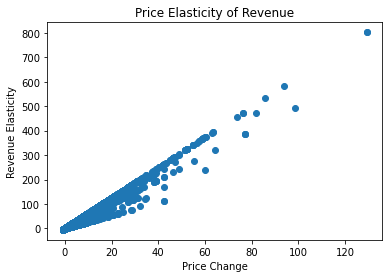

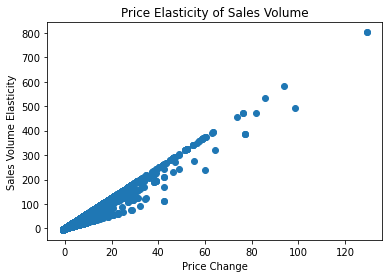

In [50]:
my_data['revenue_elasticity'] = my_data['price_change'] * my_data['avg_price']

plt.figure()
plt.scatter(my_data['price_change'], my_data['revenue_elasticity'])
plt.xlabel("Price Change")
plt.ylabel("Revenue Elasticity")
plt.title("Price Elasticity of Revenue")
plt.show()

my_data['sales_volume_elasticity'] = my_data['price_change'] * my_data['avg_price']

plt.figure()
plt.scatter(my_data['price_change'], my_data['sales_volume_elasticity'])
plt.xlabel("Price Change")
plt.ylabel("Sales Volume Elasticity")
plt.title("Price Elasticity of Sales Volume")
plt.show()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sales_volume   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3151.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:36:33   Log-Likelihood:            -8.3581e+05
No. Observations:               85460   AIC:                         1.672e+06
Df Residuals:                   85458   BIC:                         1.672e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2826.9774     23.036    122.719      0.0

In [52]:
# Fit a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 10  # degree of the polynomial
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Get the coefficients
coef = model.named_steps['linearregression'].coef_[1]

# Calculate price elasticity
price_elasticity = coef * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print("Price elasticity (polynomial regression):", price_elasticity)


Price elasticity (polynomial regression): 0.12088430295929371


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X = my_data[['sell_price']]
y = my_data['sales_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

# Predict quantity sold
y_pred = model.predict(X_test)

# Calculate price elasticity
price_elasticity = -model.feature_importances_[0] * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print("Price elasticity (Random Forest Regressor):", price_elasticity)


Price elasticity (Random Forest Regressor): -0.0026923252144726074


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Machine (GBM) model
model = GradientBoostingRegressor(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

# Predict quantity sold
y_pred = model.predict(X_test)

# Calculate price elasticity
price_elasticity = -model.feature_importances_[0] * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print("Price elasticity (Gradient Boosting Machine):", price_elasticity)


Price elasticity (Gradient Boosting Machine): -0.0026923252144726074


Dynamic Pricing (Price Optimization)

In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Dictionary to store price elasticities for each product ID
elasticities_dict = {}


# Function to suggest price adjustments based on elasticities
def suggest_price_adjustment(elasticity):
    if elasticity < -1:
        return "Increase price"
    elif elasticity > -1 and elasticity < 0:
        return "Decrease price slightly"
    elif elasticity == 0:
        return "Maintain current price"
    elif elasticity > 0 and elasticity < 1:
        return "Decrease price"
    else:
        return "Increase price"

for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['sales_volume']
    
    model = LinearRegression()
    model.fit(X, y)
    elasticity = model.coef_[0] * (group['sell_price'].mean() / group['sales_volume'].mean())
    
    elasticities_dict[dept_id] = elasticity

# Create a DataFrame from the dictionary
result_df = pd.DataFrame({'dept_id': list(elasticities_dict.keys()), 'price_elasticity': list(elasticities_dict.values())})
result_df['suggested_adjustment'] = result_df['price_elasticity'].apply(suggest_price_adjustment)

print(result_df)


       dept_id  price_elasticity     suggested_adjustment
0      FOODS_1         -0.615877  Decrease price slightly
1      FOODS_2         -0.613937  Decrease price slightly
2      FOODS_3         -0.563878  Decrease price slightly
3    HOBBIES_1         -0.626619  Decrease price slightly
4    HOBBIES_2         -0.334187  Decrease price slightly
5  HOUSEHOLD_1         -0.565586  Decrease price slightly
6  HOUSEHOLD_2         -0.492489  Decrease price slightly


In [56]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Dictionary to store price elasticities for each department
elasticities_dict = {}

for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['sales_volume']
    
    # Fit polynomial regression model
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Calculate price elasticity
    coef_linear = model.coef_[1]
    coef_squared = model.coef_[2]
    mean_price = group['sell_price'].mean()
    mean_sales_volume = group['sales_volume'].mean()
    elasticity = (coef_linear + 2 * coef_squared * mean_price / mean_sales_volume) * mean_price / mean_sales_volume
    
    elasticities_dict[dept_id] = elasticity

# Create a DataFrame from the dictionary
result_df = pd.DataFrame({'dept_id': list(elasticities_dict.keys()), 'price_elasticity': list(elasticities_dict.values())})
result_df['suggested_adjustment'] = result_df['price_elasticity'].apply(suggest_price_adjustment)

print(result_df)


       dept_id  price_elasticity     suggested_adjustment
0      FOODS_1         -2.397083           Increase price
1      FOODS_2         -2.817858           Increase price
2      FOODS_3         -1.381568           Increase price
3    HOBBIES_1         -1.811672           Increase price
4    HOBBIES_2         -0.685550  Decrease price slightly
5  HOUSEHOLD_1         -2.021165           Increase price
6  HOUSEHOLD_2         -0.904665  Decrease price slightly


In [57]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Dictionary to store price elasticities for each department
elasticities_dict = {}

for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['sales_volume']
    
    # Fit Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Calculate price elasticity
    elasticity = -model.feature_importances_[0] * (group['sell_price'].mean() / group['sales_volume'].mean())
    
    elasticities_dict[dept_id] = elasticity

# Create a DataFrame from the dictionary
result_df = pd.DataFrame({'dept_id': list(elasticities_dict.keys()), 'price_elasticity': list(elasticities_dict.values())})
result_df['suggested_adjustment'] = result_df['price_elasticity'].apply(suggest_price_adjustment)

print(result_df)


       dept_id  price_elasticity     suggested_adjustment
0      FOODS_1         -0.001547  Decrease price slightly
1      FOODS_2         -0.001605  Decrease price slightly
2      FOODS_3         -0.000592  Decrease price slightly
3    HOBBIES_1         -0.004157  Decrease price slightly
4    HOBBIES_2         -0.006210  Decrease price slightly
5  HOUSEHOLD_1         -0.002062  Decrease price slightly
6  HOUSEHOLD_2         -0.009095  Decrease price slightly


Dynamic Pricing (Polynomial Regression)

In [58]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Calculate price elasticities for each department using polynomial regression
elasticities_dict = {}
for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['quantity_sold']
    
    # Fit polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(X, y)
    
    # Calculate price elasticity
    elasticity = model.named_steps['linearregression'].coef_[1] * (group['sell_price'].mean() / group['quantity_sold'].mean())
    elasticities_dict[dept_id] = elasticity
    

# Function to calculate optimal price based on elasticity
def calculate_optimal_price(elasticity, current_price):
    if elasticity < -1:
        return current_price * 0.9  # Decrease price by 10%
    elif elasticity > -1 and elasticity < 0:
        return current_price * 0.95  # Decrease price by 5%
    elif elasticity == 0:
        return current_price  # Maintain current price
    elif elasticity > 0 and elasticity < 1:
        return current_price * 1.05  # Increase price by 5%
    else:
        return current_price * 1.1  # Increase price by 10%

# Apply dynamic pricing strategy for each department
my_data['elasticity'] = my_data['dept_id'].map(elasticities_dict)
my_data['optimal_price'] = my_data.apply(lambda x: calculate_optimal_price(x['elasticity'], x['sell_price']), axis=1)


In [59]:
my_data_poly = my_data
my_data_poly.to_csv('dynamic_pricing_poly.csv', index=False)

Dynamic Pricing (Random Forest)

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Calculate price elasticities for each department using Random Forest Regressor
elasticities_dict = {}
for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['quantity_sold']
    
    # Fit Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Calculate price elasticity
    elasticity = -model.feature_importances_[0] * (group['sell_price'].mean() / group['quantity_sold'].mean())
    elasticities_dict[dept_id] = elasticity

# Function to calculate optimal price based on elasticity
def calculate_optimal_price(elasticity, current_price, decrease_by=0.1, increase_by=0.1, maintain_price_range=(0.9, 1.1)):
    if elasticity < -1:
        return max(current_price * (1 - decrease_by), maintain_price_range[0])  # Decrease price by decrease_by
    elif elasticity > -1 and elasticity < 0:
        return max(current_price * (1 - decrease_by/2), maintain_price_range[0])  # Decrease price by decrease_by/2
    elif elasticity == 0:
        return current_price  # Maintain current price
    elif elasticity > 0 and elasticity < 1:
        return min(current_price * (1 + increase_by/2), maintain_price_range[1])  # Increase price by increase_by/2
    else:
        return min(current_price * (1 + increase_by), maintain_price_range[1])  # Increase price by increase_by


# Apply dynamic pricing strategy for each department
my_data['elasticity'] = my_data['dept_id'].map(elasticities_dict)
my_data['optimal_price'] = my_data.apply(lambda x: calculate_optimal_price(x['elasticity'], x['sell_price']), axis=1)

In [61]:
my_data_rf = my_data
my_data_rf.to_csv('dynamic_pricing_rf.csv', index=False)

Prediciting Old Price vs New (Optimal) Price Sales Volume and Revenue

In [62]:
dp_rf = pd.read_csv("dynamic_pricing_rf.csv")

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Group the data by department
grouped = dp_rf.groupby('dept_id')

# Initialize lists to store all predicted quantities and actual quantities
all_predicted_quantity_sold = []
all_actual_quantity_sold = []

# Train a Random Forest model for each group
for name, group in grouped:
    X = group[['sell_price', 'optimal_price']]
    y = group['quantity_sold']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict quantity sold for the test data
    predicted_quantity_sold = model.predict(X_test)
    
    # Extend the lists with predicted and actual quantities for this department
    all_predicted_quantity_sold.extend(predicted_quantity_sold)
    all_actual_quantity_sold.extend(y_test)

# Calculate mean squared error
mse = mean_squared_error(all_actual_quantity_sold, all_predicted_quantity_sold)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 10740414.148945706


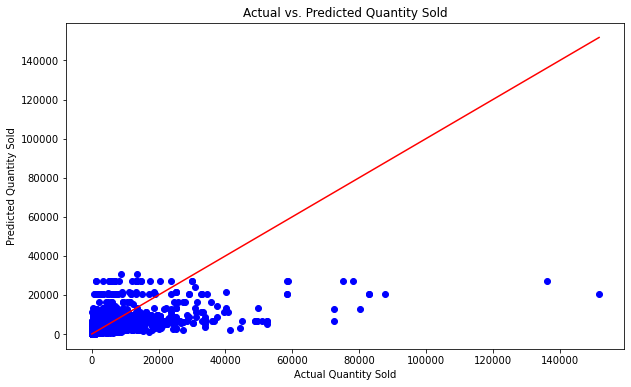

In [64]:
# Plot the predicted quantity sold vs. actual quantity sold
plt.figure(figsize=(10, 6))
plt.scatter(all_actual_quantity_sold, all_predicted_quantity_sold, color='blue')
plt.plot([min(all_actual_quantity_sold), max(all_actual_quantity_sold)], [min(all_actual_quantity_sold), max(all_actual_quantity_sold)], color='red')
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold')
plt.show()

In [65]:
# Initialize lists to store old price, optimal price, actual quantity sold, predicted quantity sold, and revenue
all_old_price = []
all_optimal_price = []
all_actual_quantity_sold = []
all_predicted_quantity_sold = []
all_revenue = []
all_actual_revenue = []

grouped = dp_rf.groupby('dept_id')

# Train a Random Forest model for each group
for name, group in grouped:
    X = group[['sell_price', 'optimal_price']]
    y = group['quantity_sold']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict quantity sold for the test data
    predicted_quantity_sold = model.predict(X_test)
    
    # Extend the lists with old price, optimal price, actual and predicted quantities for this department
    all_old_price.extend(X_test['sell_price'])
    all_optimal_price.extend(X_test['optimal_price'])
    all_actual_quantity_sold.extend(y_test)
    all_predicted_quantity_sold.extend(predicted_quantity_sold)

    # Calculate revenue based on predicted quantity sold and price
    revenue = predicted_quantity_sold * X_test['optimal_price']
    all_revenue.extend(revenue)

    # Calculate actual revenue based on actual quantity sold and price
    actual_revenue = y_test * X_test['sell_price']
    all_actual_revenue.extend(actual_revenue)

    # Print the old price, optimal price, actual and predicted quantities, and revenue for this department
    print(f"Department: {name}")
    print("Old Price\tOptimal Price\tActual Quantity Sold\tPredicted Quantity Sold\tActual Revenue\tPredicted Revenue")
    for i in range(len(X_test)):
        print(f"{X_test.iloc[i]['sell_price']}\t\t{X_test.iloc[i]['optimal_price']}\t\t{y_test.iloc[i]}\t\t\t{predicted_quantity_sold[i]}\t\t\t{actual_revenue.iloc[i]}\t\t\t{revenue.iloc[i]}")
    print("\n")

# Calculate mean squared error
mse = mean_squared_error(all_actual_quantity_sold, all_predicted_quantity_sold)
print(f"Mean Squared Error: {mse}")


Department: FOODS_1
Old Price	Optimal Price	Actual Quantity Sold	Predicted Quantity Sold	Actual Revenue	Predicted Revenue
2.24		2.128		1107.0			1763.9289987289462			2479.6800000000003			3753.6409092951976
7.58		7.201		2097.0			1164.117531571831			15895.26			8382.810344848755
1.98		1.881		1862.0			1416.5808587143474			3686.7599999999998			2664.5885952416875
5.64		5.358		972.0			789.2515441086689			5482.08			4228.809773334247
3.28		3.116		3491.0			1136.865942642001			11450.48			3542.4742772724753
1.78		1.6909999999999998		2172.0			4467.967893146323			3866.16			7555.333707310432
1.96		1.862		2149.0			5494.076567760174			4212.04			10229.970569169445
3.32		3.154		2001.0			2338.846115156086			6643.32			7376.7206472022945
5.98		5.681		450.0			450.5408552173518			2691.0			2559.5225984897756
2.48		2.356		396.0			1022.3862255525535			982.08			2408.7419474018157
1.0		0.95		11738.0			6733.032851910531			11738.0			6396.381209315004
0.98		0.931		1743.0			5284.429880451689			1708.1399999999999			4919

In [66]:
# Calculate total actual revenue for old price
total_actual_revenue_old_price = actual_revenue.sum()

# Calculate total predicted revenue for optimal price
total_predicted_revenue_optimal_price = revenue.sum()

# Print the total revenue for each pricing strategy
print(f"Total Actual Revenue (Old Price): {total_actual_revenue_old_price}")
print(f"Total Predicted Revenue (Optimal Price): {total_predicted_revenue_optimal_price}")

# Compare the total revenue
if total_predicted_revenue_optimal_price > total_actual_revenue_old_price:
    print("Using the optimal price generates more revenue.")
else:
    print("Using the old price generates more revenue.")


Total Actual Revenue (Old Price): 7828743.28
Total Predicted Revenue (Optimal Price): 7378865.016217891
Using the old price generates more revenue.


VISUALIZATION AND INTERPRETATION

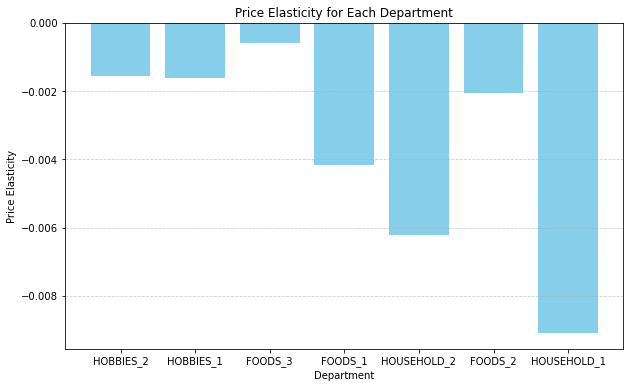

In [67]:
import matplotlib.pyplot as plt

# Price Elasticity Chart
plt.figure(figsize=(10, 6))
plt.bar(dp_rf['dept_id'].unique(), dp_rf.groupby('dept_id')['elasticity'].mean(), color='skyblue')
plt.xlabel('Department')
plt.ylabel('Price Elasticity')
plt.title('Price Elasticity for Each Department')
plt.xticks(dp_rf['dept_id'].unique())
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()




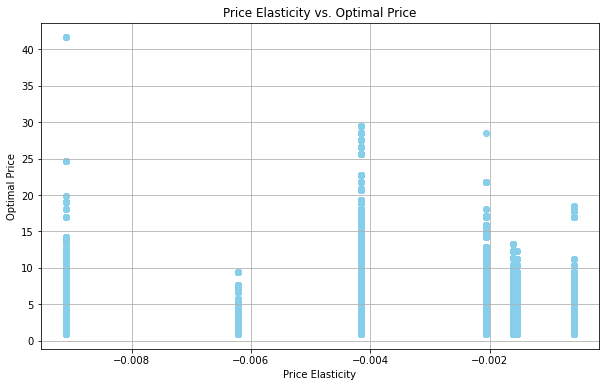

In [68]:
# Price Elasticity vs. Optimal Price
plt.figure(figsize=(10, 6))
plt.scatter(dp_rf['elasticity'], dp_rf['optimal_price'], color='skyblue', alpha=0.7)
plt.xlabel('Price Elasticity')
plt.ylabel('Optimal Price')
plt.title('Price Elasticity vs. Optimal Price')
plt.grid(True)
plt.show()


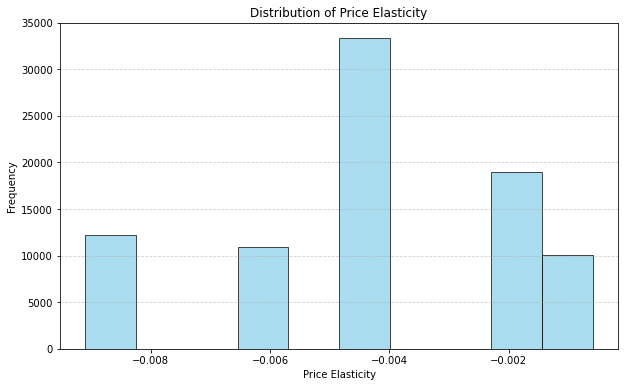

In [69]:
# Price Elasticity Distribution
plt.figure(figsize=(10, 6))
plt.hist(dp_rf['elasticity'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Price Elasticity')
plt.ylabel('Frequency')
plt.title('Distribution of Price Elasticity')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

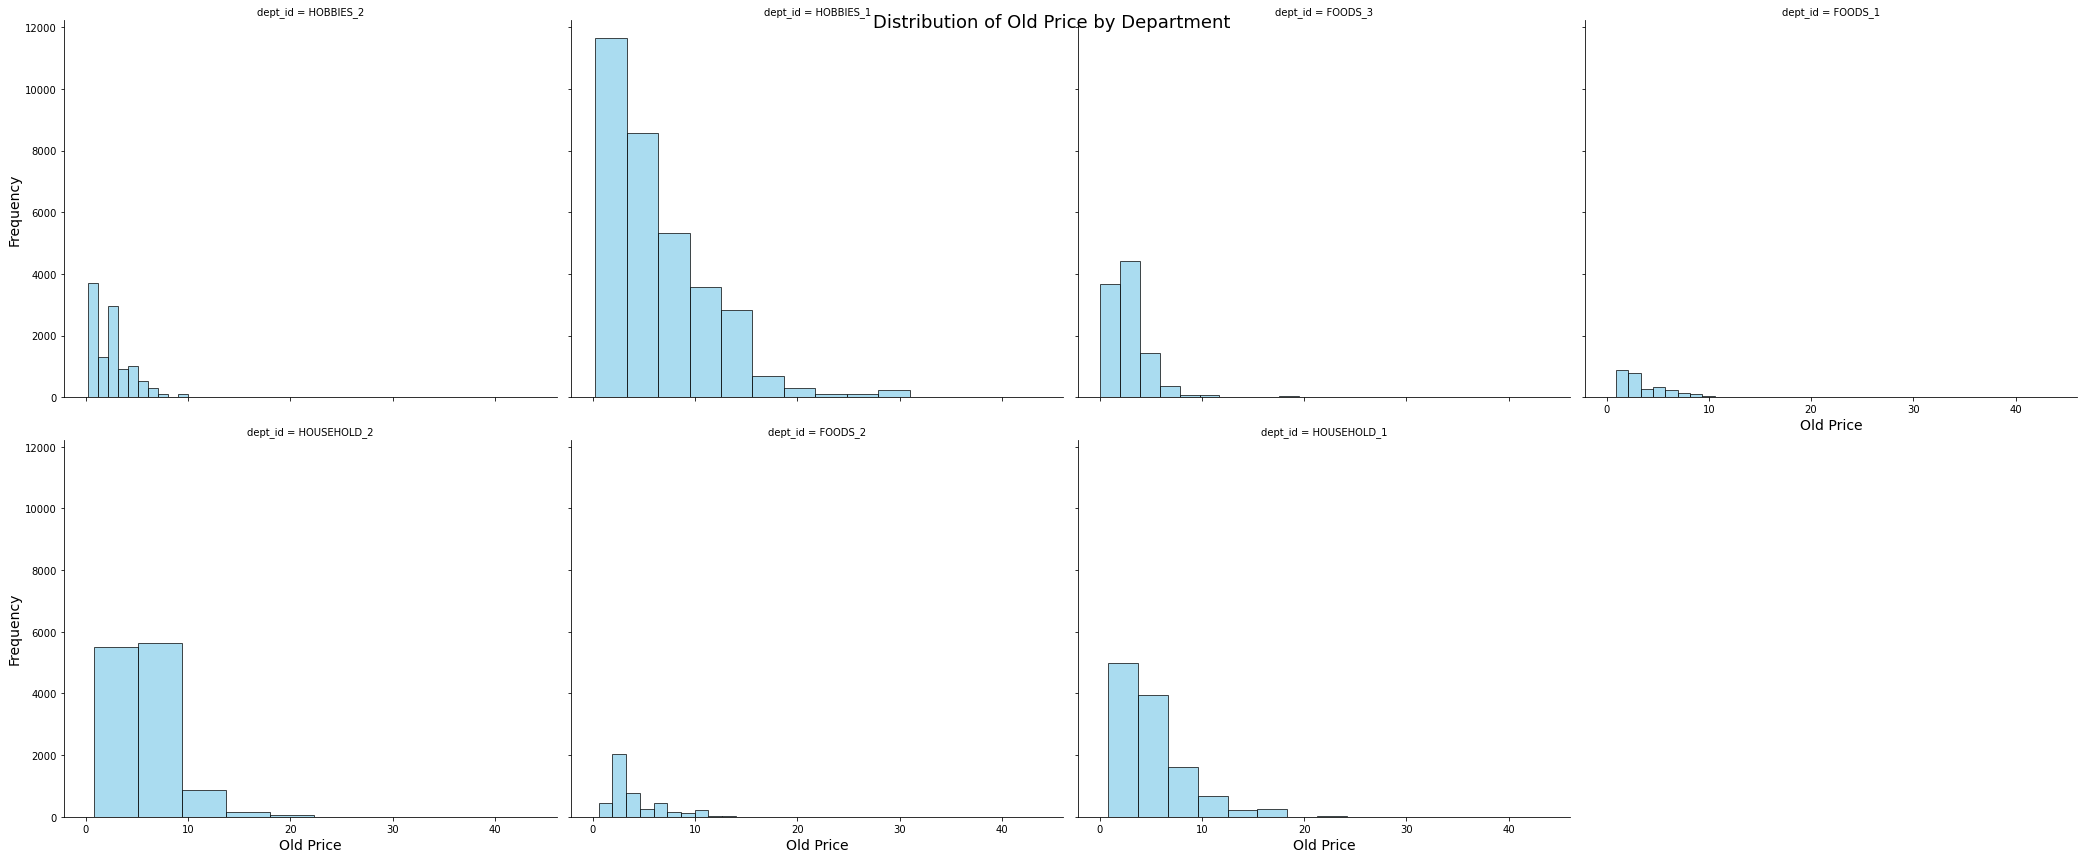

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with a separate plot for each department
g = sns.FacetGrid(dp_rf, col='dept_id', col_wrap=4, height=6, aspect=1.2)
g.map(plt.hist, 'sell_price', bins=10, color='skyblue', edgecolor='black', alpha=0.7)
g.set_axis_labels('Old Price', 'Frequency', fontsize=14)
g.fig.suptitle('Distribution of Old Price by Department', fontsize=18)
plt.show()


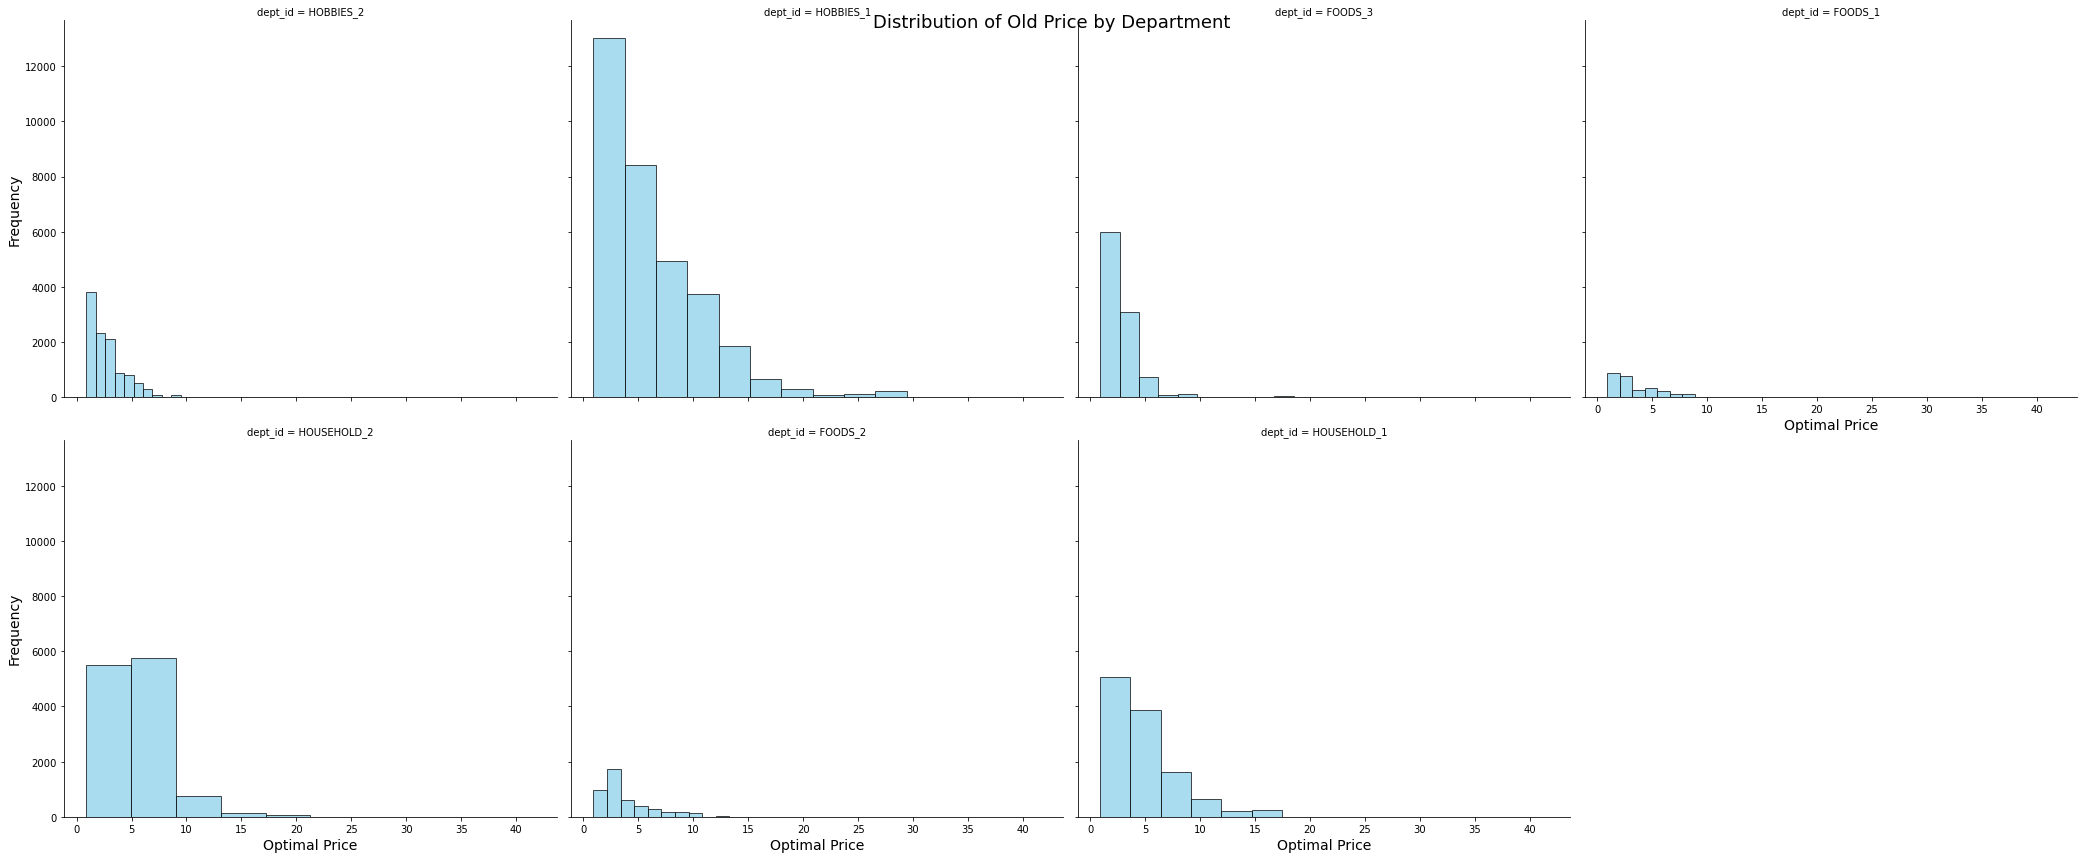

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with a separate plot for each department
g = sns.FacetGrid(dp_rf, col='dept_id', col_wrap=4, height=6, aspect=1.2)
g.map(plt.hist, 'optimal_price', bins=10, color='skyblue', edgecolor='black', alpha=0.7)
g.set_axis_labels('Optimal Price', 'Frequency', fontsize=14)
g.fig.suptitle('Distribution of Old Price by Department', fontsize=18)
plt.show()


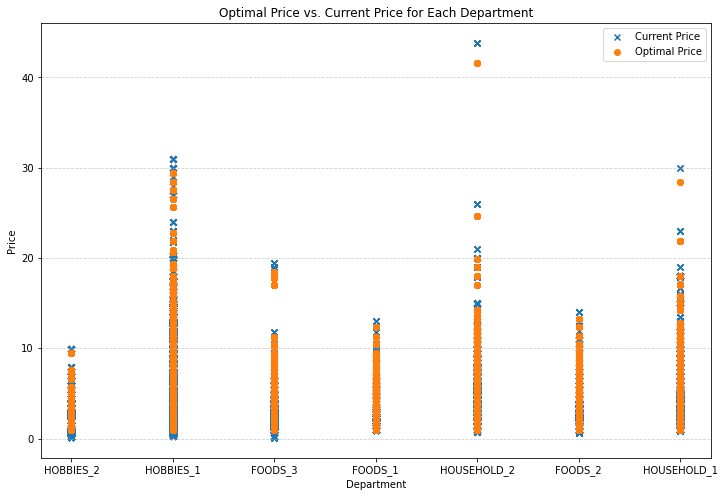

In [72]:
plt.figure(figsize=(12, 8))
plt.scatter(dp_rf['dept_id'], dp_rf['sell_price'], marker='x', label='Current Price')
plt.scatter(dp_rf['dept_id'], dp_rf['optimal_price'], marker='o', label='Optimal Price')
plt.xlabel('Department')
plt.ylabel('Price')
plt.title('Optimal Price vs. Current Price for Each Department')
plt.xticks(dp_rf['dept_id'].unique())  # Show only unique department values on the x-axis
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


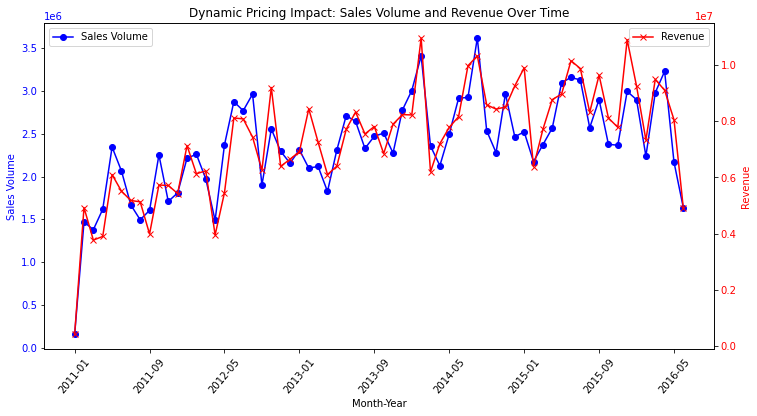

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


dp_rf['date'] = pd.to_datetime(dp_rf['date'])
dp_rf['month_year'] = dp_rf['date'].dt.to_period('M')

# Aggregate data by month and year
monthly_data = dp_rf.groupby('month_year').agg(
    {'sell_price': 'mean', 'optimal_price': 'mean', 'quantity_sold': 'sum', 'revenue': 'sum'}
).reset_index()

monthly_data['month_year'] = monthly_data['month_year'].dt.strftime('%Y-%m')


# Calculate metrics
dp_rf['sales_volume_change'] = dp_rf['quantity_sold'].pct_change()
dp_rf['revenue_change'] = dp_rf['revenue'].pct_change()

# Create plots
fig, ax1 = plt.subplots(figsize=(12, 6))


# Plot sales volume
ax1.plot(monthly_data['month_year'], monthly_data['quantity_sold'], color='b', marker='o', label='Sales Volume')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Sales Volume', color='b')
ax1.tick_params(axis='x', rotation=50)
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a secondary y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(monthly_data['month_year'], monthly_data['revenue'], color='r', marker='x', label='Revenue')
ax2.set_ylabel('Revenue', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Format x-axis ticks
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))  # Set maximum number of ticks to show
plt.title('Dynamic Pricing Impact: Sales Volume and Revenue Over Time')
plt.xticks(rotation=45)
plt.show()


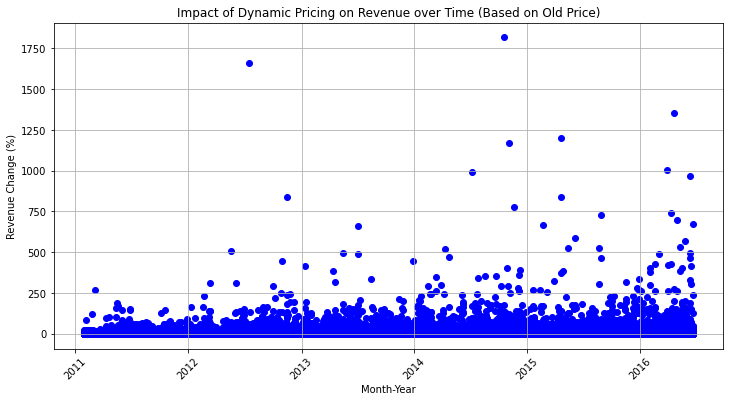

In [74]:
# Calculate the percentage change in revenue compared to the previous month based on old price
dp_rf['revenue_change'] = dp_rf['revenue'].pct_change()

# Plot the percentage change in revenue over time based on old price
plt.figure(figsize=(12, 6))
plt.scatter(dp_rf['date'], dp_rf['revenue_change'], marker='o', color='b')
plt.xlabel('Month-Year')
plt.ylabel('Revenue Change (%)')
plt.title('Impact of Dynamic Pricing on Revenue over Time (Based on Old Price)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [75]:
# Separate the data into features (X) and target variable (y)
X = dp_rf[['optimal_price']]
y = dp_rf['quantity_sold']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict quantity sold for the new optimal price
new_quantity_sold = model.predict(X_test)

# Calculate revenue based on the new quantity sold and new optimal price
new_revenue = new_quantity_sold * X_test['optimal_price']

# Predict quantity sold for the new optimal price
dp_rf['new_quantity_sold'] = model.predict(dp_rf[['optimal_price']])

# Calculate revenue based on the new quantity sold and new optimal price
dp_rf['new_revenue'] = dp_rf['new_quantity_sold'] * dp_rf['optimal_price']


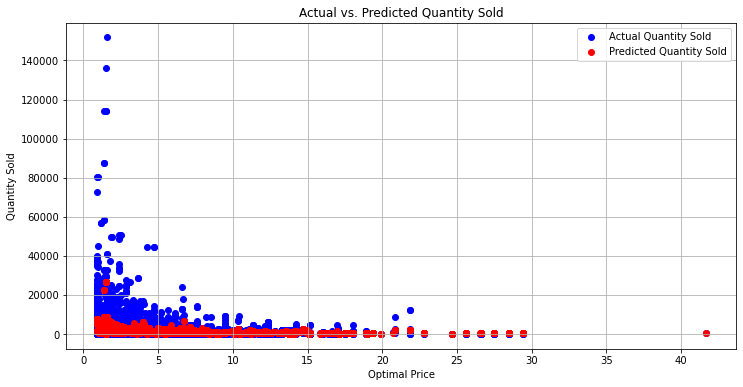

In [76]:
plt.figure(figsize=(12, 6))

# Plot the actual quantity sold
plt.scatter(X_test['optimal_price'], y_test, color='b', label='Actual Quantity Sold')

# Plot the predicted quantity sold
plt.scatter(X_test['optimal_price'], new_quantity_sold, color='r', label='Predicted Quantity Sold')

plt.xlabel('Optimal Price')
plt.ylabel('Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


slope (old): 56811.428571 intercept (old): -112725037.325238


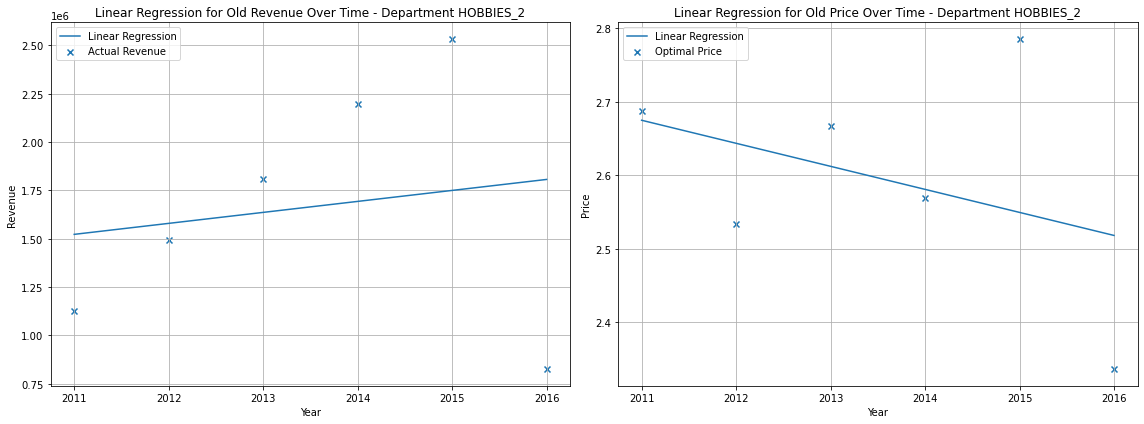

slope (old): 902394.289143 intercept (old): -1787227591.965809


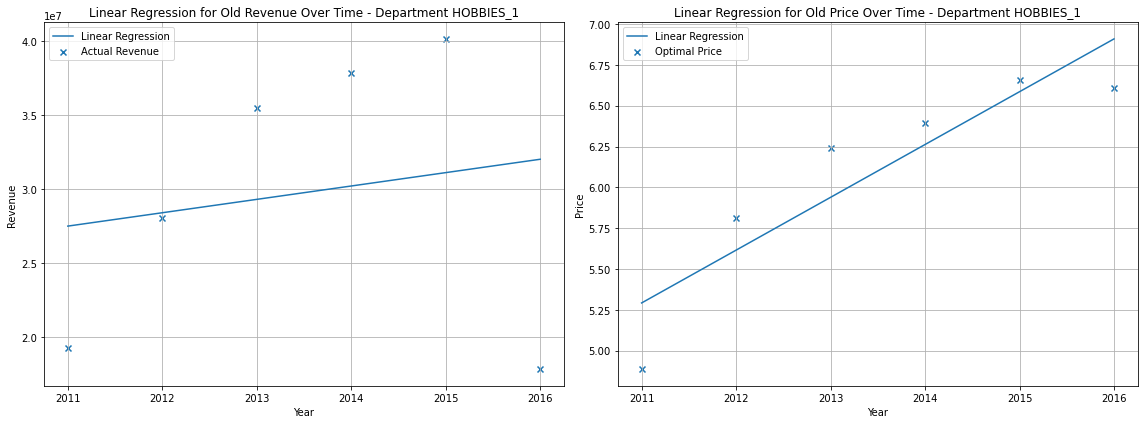

slope (old): 207655.930571 intercept (old): -400672419.170571


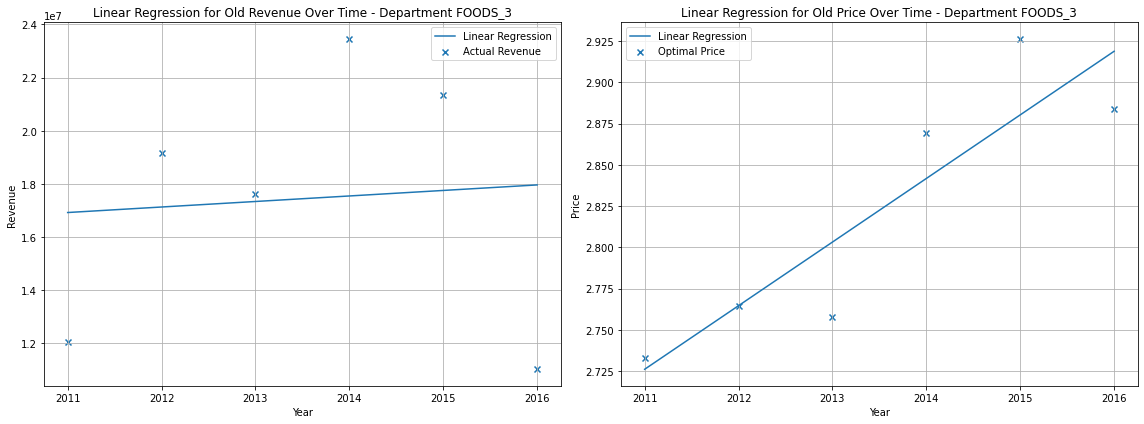

slope (old): -176.526857 intercept (old): 3148042.003524


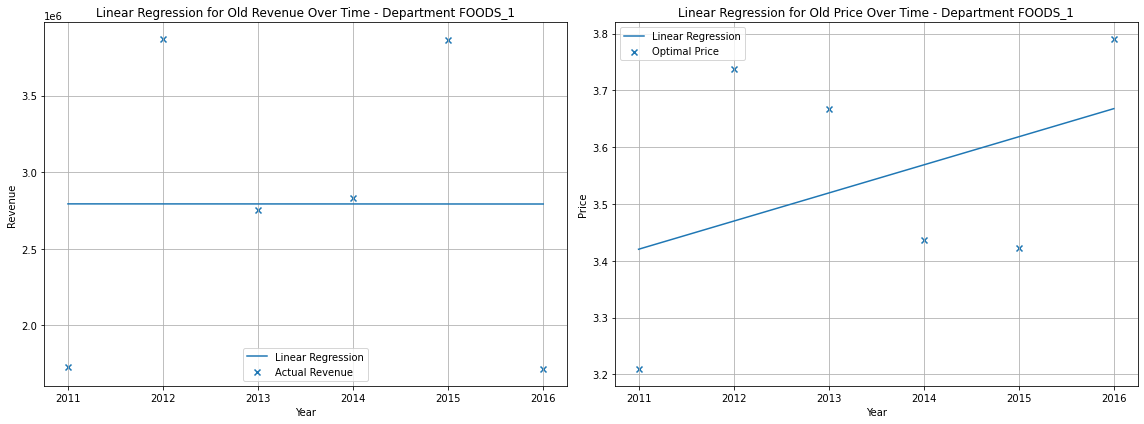

slope (old): -141499.468000 intercept (old): 291430144.204667


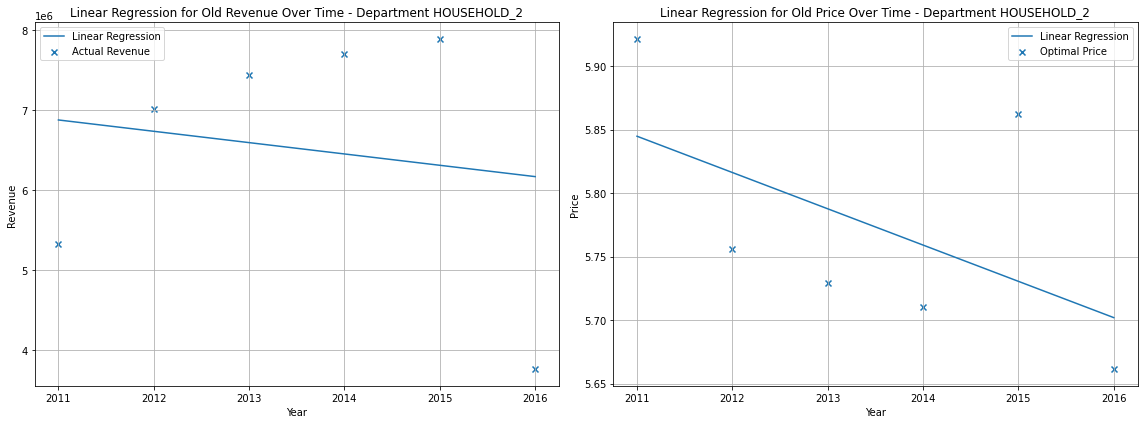

slope (old): 35419.938571 intercept (old): -65708942.331905


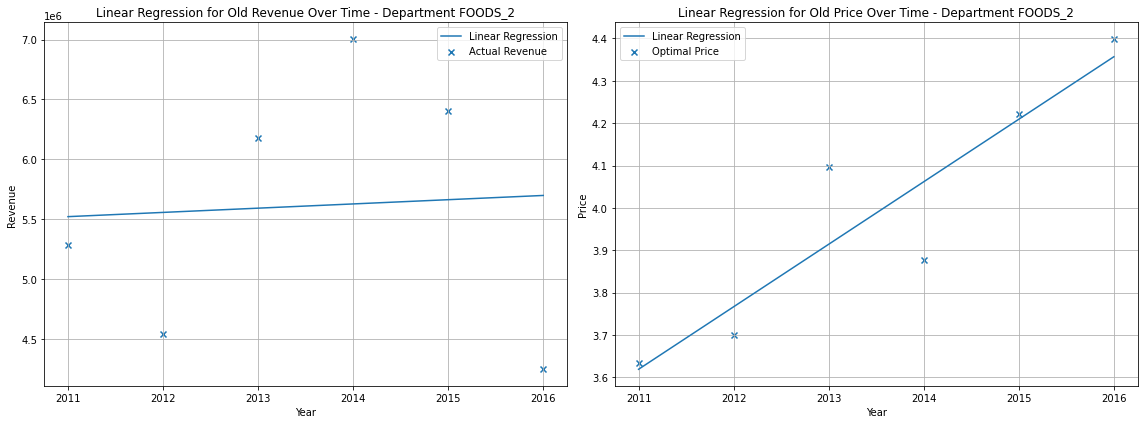

slope (old): 447222.802857 intercept (old): -883443227.462858


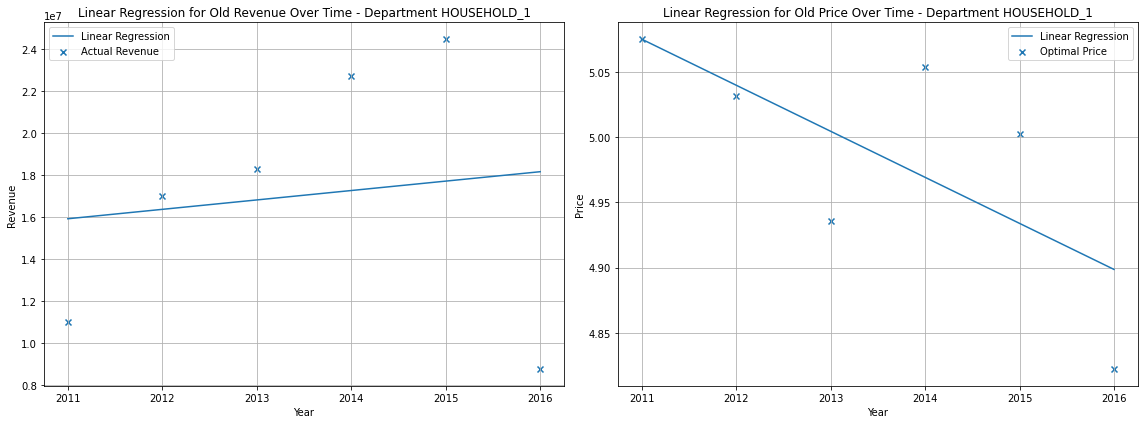

In [77]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

dp_rf['date'] = pd.to_datetime(dp_rf['date'])
dp_rf['year'] = dp_rf['date'].dt.year

# Perform linear regression for each department
departments = dp_rf['dept_id'].unique()

for dept in departments:
    dept_data = dp_rf[dp_rf['dept_id'] == dept]
    yearly_revenue = dept_data.groupby('year')['revenue'].sum()
    yearly_sell_price = dept_data.groupby('year')['sell_price'].mean()

    # Linear regression for predicted revenue
    slope_revenue_old, intercept_revenue_old, _, _, _ = linregress(yearly_revenue.index, yearly_revenue)
    line_revenue_old = slope_revenue_old * yearly_revenue.index + intercept_revenue_old

    print("slope (old): %f intercept (old): %f" % (slope_revenue_old, intercept_revenue_old))
    
    # Linear regression for optimal price
    slope_price_old, intercept_price_old, _, _, _ = linregress(yearly_sell_price.index, yearly_sell_price)
    line_price_old = slope_price_old * yearly_sell_price.index + intercept_price_old

    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(yearly_revenue.index, line_revenue_old, label='Linear Regression')
    plt.scatter(yearly_revenue.index, yearly_revenue, marker='x', label='Actual Revenue')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'Linear Regression for Old Revenue Over Time - Department {dept}')
    plt.legend()
    plt.grid(True)

    # Plot linear regression for optimal price
    plt.subplot(1, 2, 2)
    plt.plot(yearly_sell_price.index, line_price_old, label='Linear Regression')
    plt.scatter(yearly_sell_price.index, yearly_sell_price, marker='x', label='Optimal Price')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title(f'Linear Regression for Old Price Over Time - Department {dept}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



slope (optimal): 476464.030479 intercept (optimal): -954067165.742308


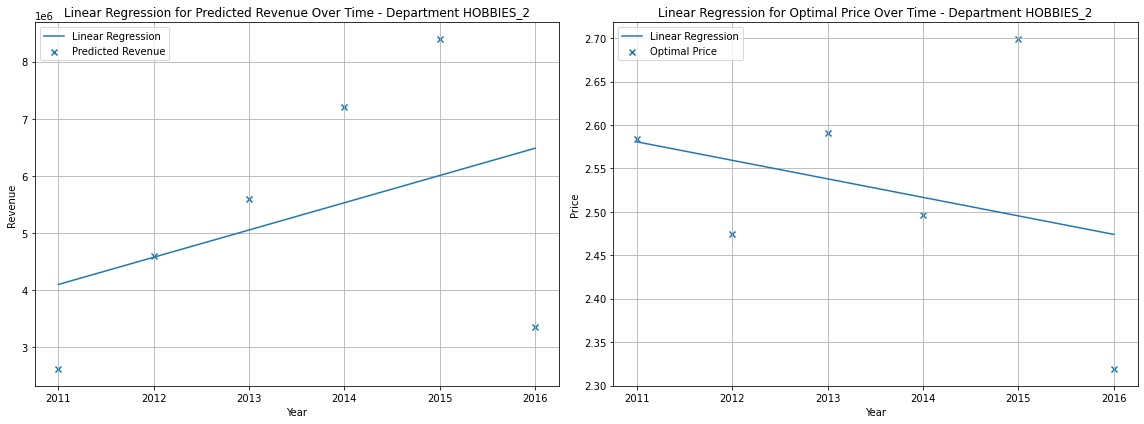

slope (optimal): 1134046.786292 intercept (optimal): -2250491681.667861


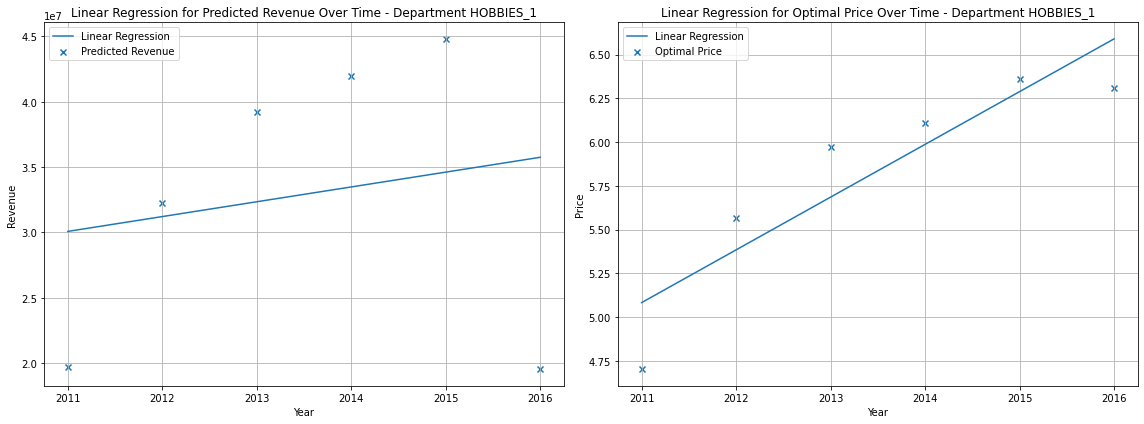

slope (optimal): 573833.543120 intercept (optimal): -1143835758.532128


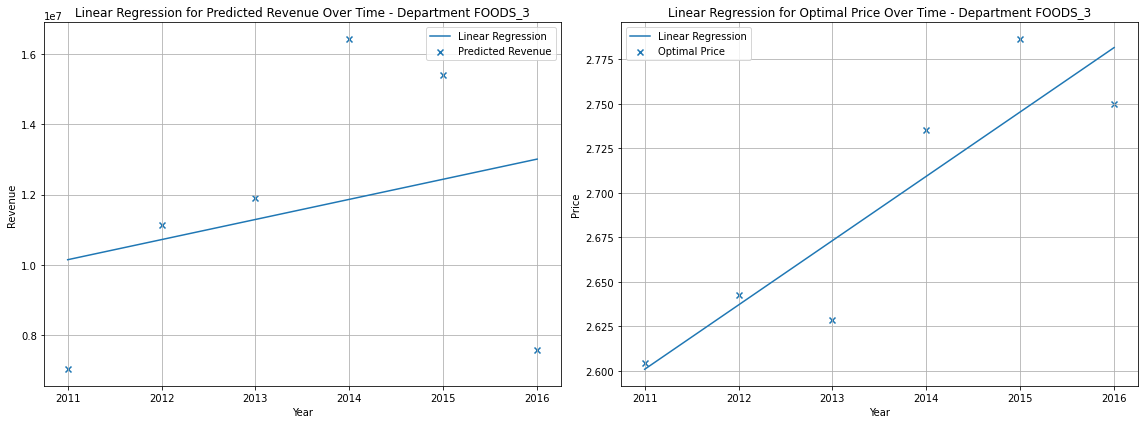

slope (optimal): 63143.595092 intercept (optimal): -124159905.063501


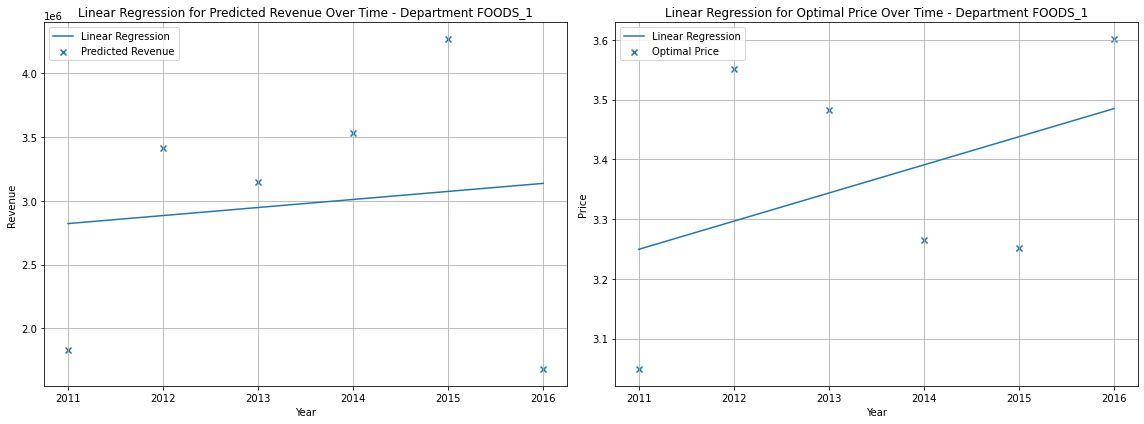

slope (optimal): 110306.202286 intercept (optimal): -212561341.494629


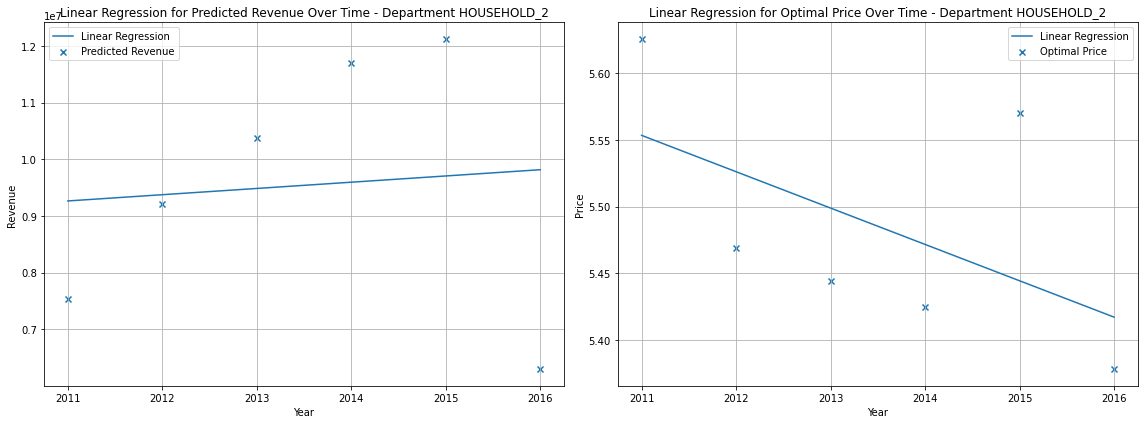

slope (optimal): 320781.453190 intercept (optimal): -641310772.543632


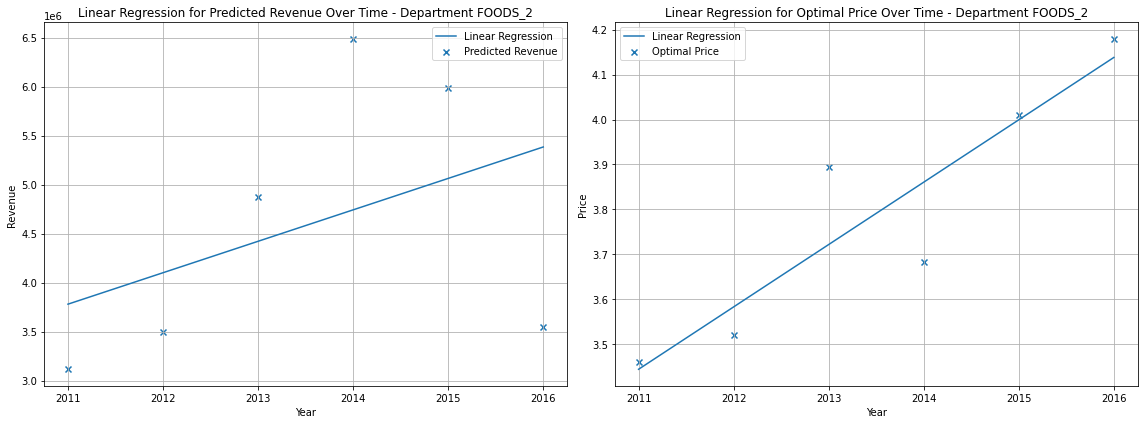

slope (optimal): 799895.738952 intercept (optimal): -1598783196.373083


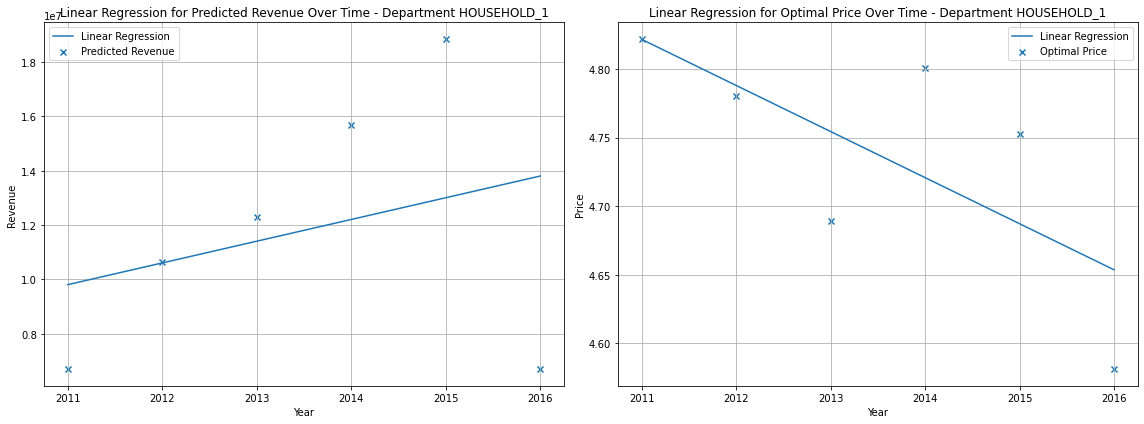

In [78]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

dp_rf['date'] = pd.to_datetime(dp_rf['date'])
dp_rf['year'] = dp_rf['date'].dt.year

# Perform linear regression for each department
departments = dp_rf['dept_id'].unique()

for dept in departments:
    dept_data = dp_rf[dp_rf['dept_id'] == dept]
    yearly_predicted_revenue = dept_data.groupby('year')['new_revenue'].sum()
    yearly_optimal_price = dept_data.groupby('year')['optimal_price'].mean()

    # Linear regression for predicted revenue
    slope_revenue, intercept_revenue, _, _, _ = linregress(yearly_predicted_revenue.index, yearly_predicted_revenue)
    line_revenue = slope_revenue * yearly_predicted_revenue.index + intercept_revenue

    print("slope (optimal): %f intercept (optimal): %f" % (slope_revenue, intercept_revenue))

    # Linear regression for optimal price
    slope_price, intercept_price, _, _, _ = linregress(yearly_optimal_price.index, yearly_optimal_price)
    line_price = slope_price * yearly_optimal_price.index + intercept_price

    plt.figure(figsize=(16, 6))

    # Plot linear regression for predicted revenue
    plt.subplot(1, 2, 1)
    plt.plot(yearly_predicted_revenue.index, line_revenue, label='Linear Regression')
    plt.scatter(yearly_predicted_revenue.index, yearly_predicted_revenue, marker='x', label='Predicted Revenue')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'Linear Regression for Predicted Revenue Over Time - Department {dept}')
    plt.legend()
    plt.grid(True)

    # Plot linear regression for optimal price
    plt.subplot(1, 2, 2)
    plt.plot(yearly_optimal_price.index, line_price, label='Linear Regression')
    plt.scatter(yearly_optimal_price.index, yearly_optimal_price, marker='x', label='Optimal Price')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title(f'Linear Regression for Optimal Price Over Time - Department {dept}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [79]:
for dept in departments:
    dept_data = dp_rf[dp_rf['dept_id'] == dept]
    yearly_revenue = dept_data.groupby('year')['revenue'].sum()
    yearly_sell_price = dept_data.groupby('year')['sell_price'].mean()

    # Linear regression for predicted revenue
    slope_revenue_old, intercept_revenue_old, _, _, _ = linregress(yearly_revenue.index, yearly_revenue)
    line_revenue_old = slope_revenue_old * yearly_revenue.index + intercept_revenue_old

    print("slope (old): %f intercept (old): %f" % (slope_revenue_old, intercept_revenue_old))
    print("Predicted Revenue in 2017:" , (slope_revenue_old*2017+ intercept_revenue_old) ,"\n")

slope (old): 56811.428571 intercept (old): -112725037.325238
Predicted Revenue in 2017: 1863614.103333339 

slope (old): 902394.289143 intercept (old): -1787227591.965809
Predicted Revenue in 2017: 32901689.235333443 

slope (old): 207655.930571 intercept (old): -400672419.170571
Predicted Revenue in 2017: 18169592.791999996 

slope (old): -176.526857 intercept (old): 3148042.003524
Predicted Revenue in 2017: 2791987.3326666667 

slope (old): -141499.468000 intercept (old): 291430144.204667
Predicted Revenue in 2017: 6025717.248666644 

slope (old): 35419.938571 intercept (old): -65708942.331905
Predicted Revenue in 2017: 5733073.766666666 

slope (old): 447222.802857 intercept (old): -883443227.462858
Predicted Revenue in 2017: 18605165.900000095 



In [80]:
for dept in departments:
    dept_data = dp_rf[dp_rf['dept_id'] == dept]
    yearly_predicted_revenue = dept_data.groupby('year')['new_revenue'].sum()
    yearly_optimal_price = dept_data.groupby('year')['optimal_price'].mean()

    # Linear regression for predicted revenue
    slope_revenue, intercept_revenue, _, _, _ = linregress(yearly_predicted_revenue.index, yearly_predicted_revenue)
    line_revenue = slope_revenue * yearly_predicted_revenue.index + intercept_revenue

    print("slope (optimal): %f intercept (optimal): %f" % (slope_revenue, intercept_revenue))
    print("Predicted Revenue in 2017:" , (slope_revenue*2017+ intercept_revenue) ,"\n")

slope (optimal): 476464.030479 intercept (optimal): -954067165.742308
Predicted Revenue in 2017: 6960783.733786583 

slope (optimal): 1134046.786292 intercept (optimal): -2250491681.667861
Predicted Revenue in 2017: 36880686.28259659 

slope (optimal): 573833.543120 intercept (optimal): -1143835758.532128
Predicted Revenue in 2017: 13586497.940806389 

slope (optimal): 63143.595092 intercept (optimal): -124159905.063501
Predicted Revenue in 2017: 3200726.2371367514 

slope (optimal): 110306.202286 intercept (optimal): -212561341.494629
Predicted Revenue in 2017: 9926268.515666544 

slope (optimal): 320781.453190 intercept (optimal): -641310772.543632
Predicted Revenue in 2017: 5705418.539698124 

slope (optimal): 799895.738952 intercept (optimal): -1598783196.373083
Predicted Revenue in 2017: 14606509.09371996 



FEATURE ENGINEERING

In [81]:
# Calculate the base price for each group
base_prices = my_data.groupby(['dept_id', 'state_id'])['sell_price'].mean()

# Merge the base prices back into the original DataFrame
my_data = my_data.merge(base_prices, on=['dept_id', 'state_id'], suffixes=('', '_base'), how='left')

# Rename the columns for clarity
my_data.rename(columns={'sell_price_base': 'base_price'}, inplace=True)

# Display the first few rows of the DataFrame with the base prices
print(my_data[['dept_id', 'state_id', 'sell_price', 'base_price']])


           dept_id state_id  sell_price  base_price
0        HOBBIES_2       CA        0.97    2.569515
1        HOBBIES_1       WI       11.47    6.170961
2        HOBBIES_2       TX        0.97    2.649043
3          FOODS_3       CA        1.98    2.803124
4        HOBBIES_2       TX        0.97    2.649043
...            ...      ...         ...         ...
85455    HOBBIES_1       CA       13.98    6.139715
85456    HOBBIES_1       WI       13.98    6.170961
85457      FOODS_3       WI        2.98    2.800192
85458      FOODS_1       WI        1.00    3.457509
85459  HOUSEHOLD_2       CA        4.97    5.732286

[85460 rows x 4 columns]


In [82]:
# Calculate the base price for each sell price within each group
my_data['base_price'] = my_data.groupby(['dept_id', 'state_id'])['sell_price'].transform('first')

# Count the occurrences of each sell price as the base price within each group
base_price_counts = my_data.groupby(['dept_id', 'state_id', 'base_price', 'sell_price'])['sell_price'].count().reset_index(name='count')

# Display the sell price, base price, and the count of occurrences
print(base_price_counts[['dept_id', 'state_id', 'sell_price', 'base_price', 'count']])


          dept_id state_id  sell_price  base_price  count
0         FOODS_1       CA        0.94        2.24      9
1         FOODS_1       CA        0.97        2.24      1
2         FOODS_1       CA        0.98        2.24     79
3         FOODS_1       CA        1.00        2.24     25
4         FOODS_1       CA        1.36        2.24      4
...           ...      ...         ...         ...    ...
3601  HOUSEHOLD_2       WI       19.98        5.47      4
3602  HOUSEHOLD_2       WI       20.00        5.47     10
3603  HOUSEHOLD_2       WI       20.97        5.47      1
3604  HOUSEHOLD_2       WI       25.97        5.47      4
3605  HOUSEHOLD_2       WI       43.84        5.47      2

[3606 rows x 5 columns]


In [83]:
my_data.columns

Index(['id', 'state_id', 'dept_id', 'cat_id', 'sell_price', 'revenue',
       'sales_volume', 'date', 'event_type_1', 'avg_price', 'month', 'year',
       'quantity_change', 'price_change', 'quantity_sold',
       'revenue_elasticity', 'sales_volume_elasticity', 'elasticity',
       'optimal_price', 'base_price'],
      dtype='object')

In [84]:
my_data['year'] = my_data['date'].dt.year

In [85]:
# Dictionary to store price elasticities for each department
elasticities_dict = {}

my_data['year'] = my_data['date'].dt.year

grouped_data = my_data.groupby(['dept_id', 'state_id', 'year'])

for (dept_id, state, year), group in grouped_data:
    # Filter out rows where sell price is the same
    group = group[group['sell_price'].duplicated(keep=False)]

    # Calculate price elasticity
    change_in_quantity = group['quantity_sold'].pct_change()
    change_in_price = group['sell_price'].pct_change()

    price_elasticity = change_in_quantity / change_in_price
    price_elasticity = price_elasticity.replace([float('inf'), -float('inf')], pd.NA)

    # Exclude NaN and infinite values
    price_elasticity = price_elasticity.dropna()

    # Store price elasticity in the dictionary
    elasticities_dict[(dept_id, state, year)] = price_elasticity.mean()

# Create a DataFrame from the dictionary
elasticities_df = pd.DataFrame(elasticities_dict.items(), columns=['dept_id_state_year', 'price_elasticity'])
elasticities_df[['dept_id', 'state_id', 'year']] = pd.DataFrame(elasticities_df['dept_id_state_year'].tolist(), index=elasticities_df.index)
elasticities_df = elasticities_df.drop('dept_id_state_year', axis=1)

print(elasticities_df)


     price_elasticity      dept_id state_id  year
0           -5.757541      FOODS_1       CA  2011
1           -3.903694      FOODS_1       CA  2012
2           -5.457923      FOODS_1       CA  2013
3           -9.420669      FOODS_1       CA  2014
4           -3.888613      FOODS_1       CA  2015
..                ...          ...      ...   ...
121          0.757655  HOUSEHOLD_2       WI  2012
122          1.681570  HOUSEHOLD_2       WI  2013
123         -3.646841  HOUSEHOLD_2       WI  2014
124        -18.873673  HOUSEHOLD_2       WI  2015
125          6.964371  HOUSEHOLD_2       WI  2016

[126 rows x 4 columns]


In [86]:
elasticities_df[elasticities_df['year'] == 2011]

price_elasticity      dept_id state_id  year
0           -5.757541      FOODS_1       CA  2011
6            2.905345      FOODS_1       TX  2011
12           0.316381      FOODS_1       WI  2011
18          16.464991      FOODS_2       CA  2011
24          39.627297      FOODS_2       TX  2011
30          -2.839122      FOODS_2       WI  2011
36        -291.010758      FOODS_3       CA  2011
42          -3.676403      FOODS_3       TX  2011
48          -4.423143      FOODS_3       WI  2011
54           1.090074    HOBBIES_1       CA  2011
60           0.713550    HOBBIES_1       TX  2011
66          -1.056913    HOBBIES_1       WI  2011
72           0.863950    HOBBIES_2       CA  2011
78          -1.670498    HOBBIES_2       TX  2011
84           0.959959    HOBBIES_2       WI  2011
90          -2.152915  HOUSEHOLD_1       CA  2011
96          -2.258761  HOUSEHOLD_1       TX  2011
102        -11.246477  HOUSEHOLD_1       WI  2011
108         -6.510203  HOUSEHOLD_2       CA  2011
114          0.284627  HOUSEHOLD_2       TX  2011
120         -4.016243  HOUSEHOLD_2       WI  2011

In [87]:
# Dictionary to store price elasticities for each department
elasticities_dict = {}

my_data['year'] = my_data['date'].dt.year

grouped_data = my_data.groupby(['dept_id', 'state_id', 'year', 'event_type_1'])

for (dept_id, state, year, event_type), group in grouped_data:
    # Filter out rows where sell price is the same
    group = group[group['sell_price'].duplicated(keep=False)]

    # Calculate price elasticity
    change_in_quantity = group['quantity_sold'].pct_change()
    change_in_price = group['sell_price'].pct_change()

    price_elasticity = change_in_quantity / change_in_price
    price_elasticity = price_elasticity.replace([float('inf'), -float('inf')], pd.NA)

    # Exclude NaN and infinite values
    price_elasticity = price_elasticity.dropna()

    # Store price elasticity in the dictionary
    elasticities_dict[(dept_id, state, year, event_type)] = price_elasticity.mean()

# Create a DataFrame from the dictionary
elasticities_df = pd.DataFrame(elasticities_dict.items(), columns=['dept_id_state_year_event', 'price_elasticity'])
elasticities_df[['dept_id', 'state_id', 'year', 'event_type']] = pd.DataFrame(elasticities_df['dept_id_state_year_event'].tolist(), index=elasticities_df.index)
elasticities_df = elasticities_df.drop('dept_id_state_year_event', axis=1)

(elasticities_df)


price_elasticity      dept_id state_id  year event_type
0                 NaN      FOODS_1       CA  2011   Cultural
1                 NaN      FOODS_1       CA  2011   National
2           -1.869438      FOODS_1       CA  2011   No Event
3           -0.828862      FOODS_1       CA  2011  Religious
4            1.517619      FOODS_1       CA  2012   Cultural
..                ...          ...      ...   ...        ...
604         -2.035038  HOUSEHOLD_2       WI  2016   Cultural
605         -8.952822  HOUSEHOLD_2       WI  2016   National
606          8.224611  HOUSEHOLD_2       WI  2016   No Event
607         -0.792487  HOUSEHOLD_2       WI  2016  Religious
608               NaN  HOUSEHOLD_2       WI  2016   Sporting

[609 rows x 5 columns]

In [88]:
elasticities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_elasticity  476 non-null    float64
 1   dept_id           609 non-null    object 
 2   state_id          609 non-null    object 
 3   year              609 non-null    int64  
 4   event_type        609 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 23.9+ KB


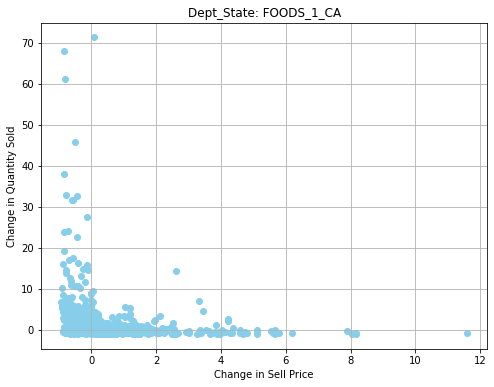

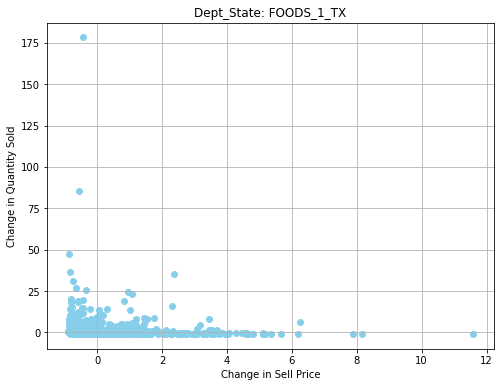

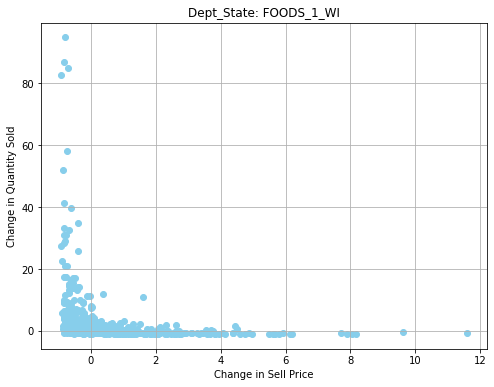

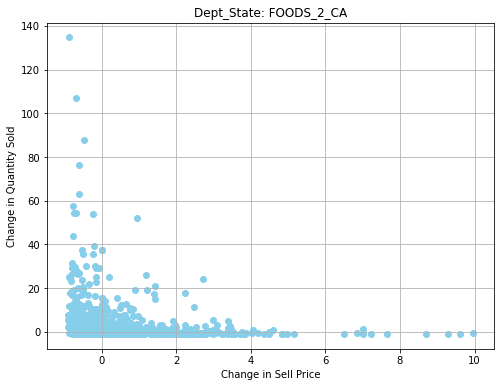

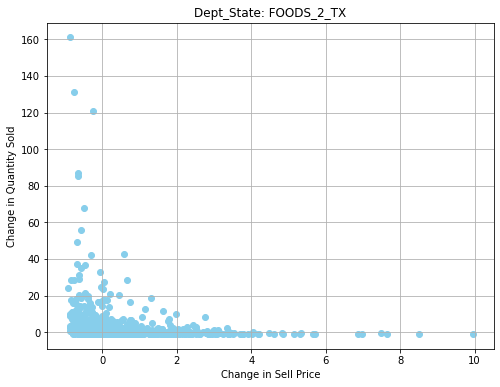

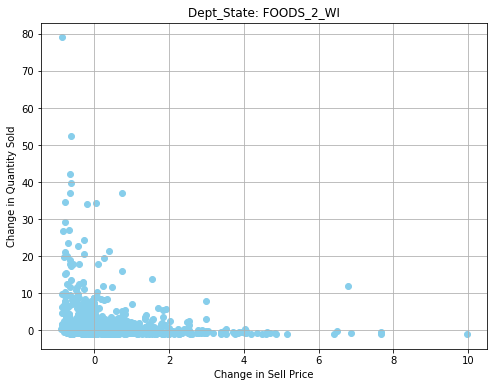

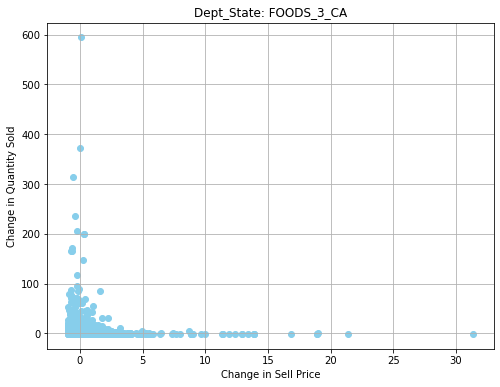

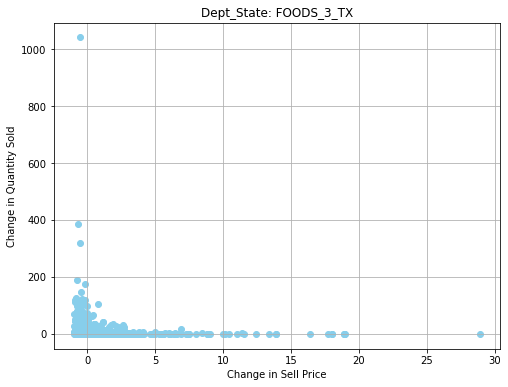

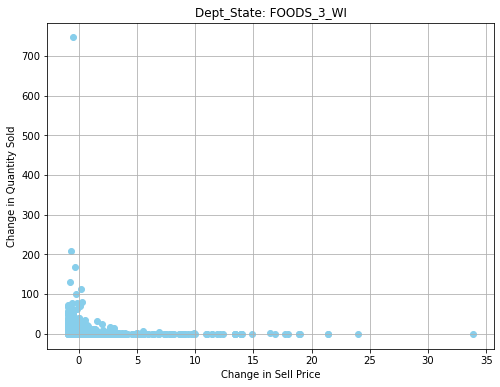

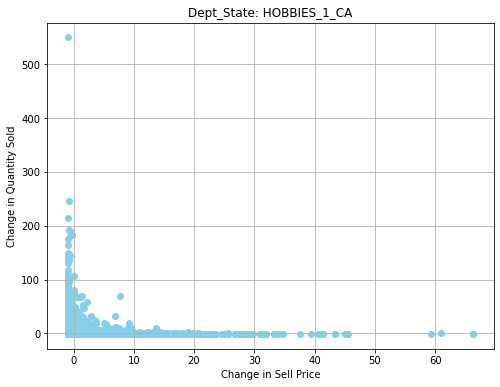

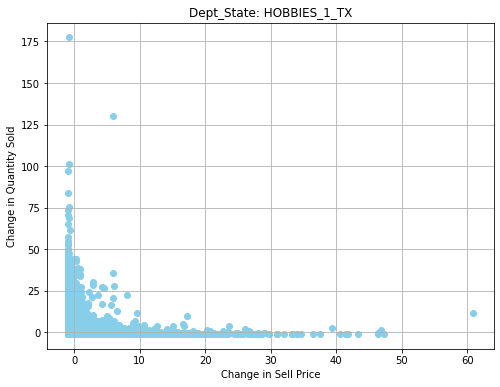

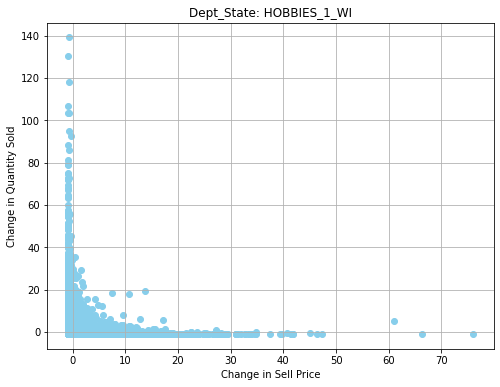

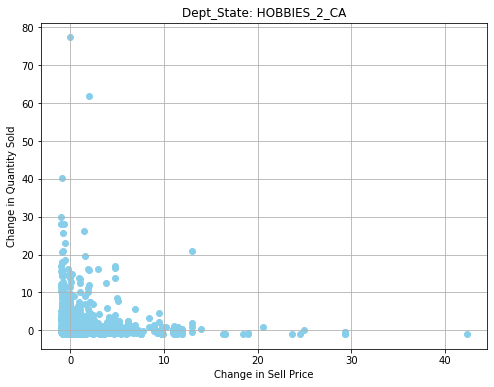

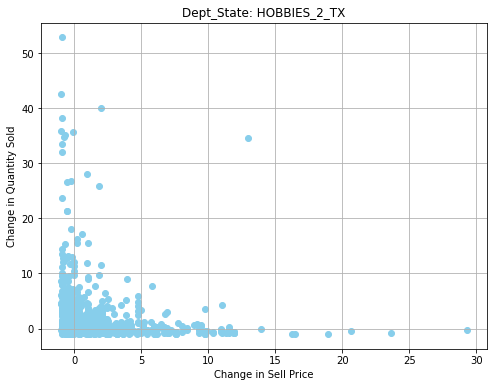

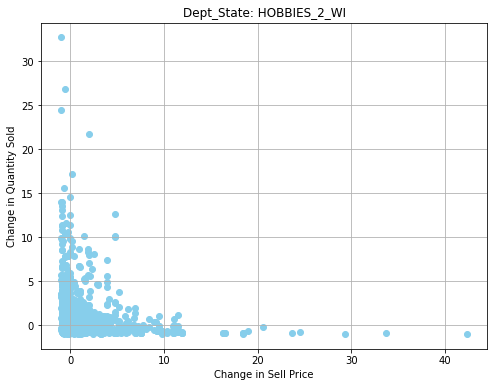

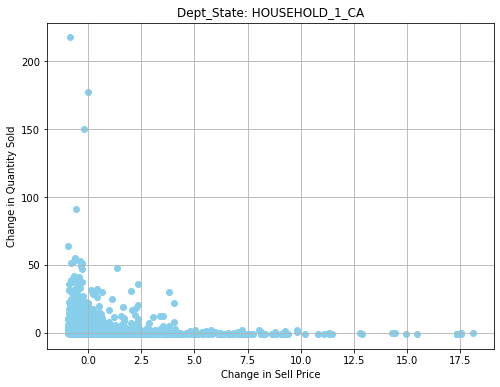

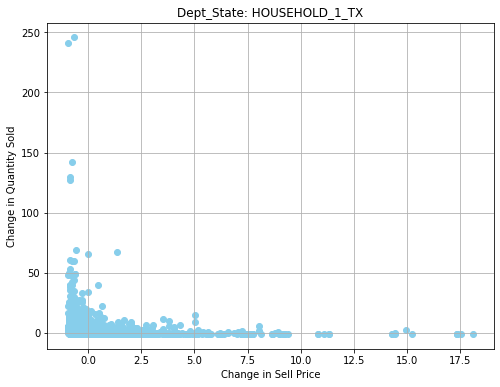

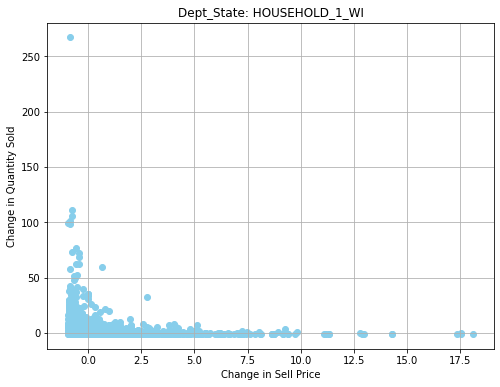

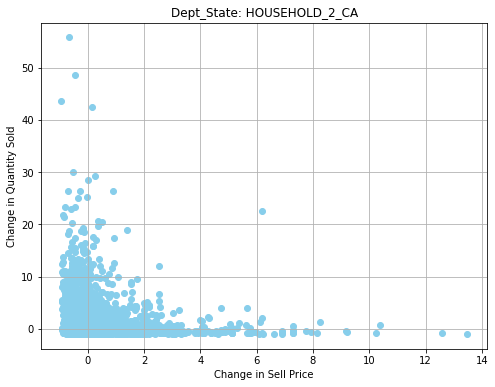

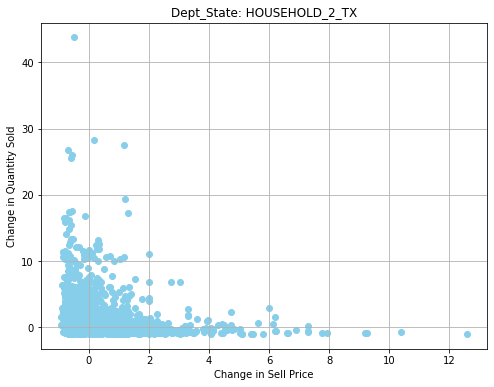

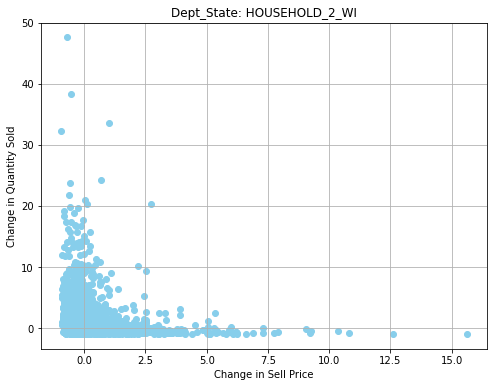

In [89]:
import matplotlib.pyplot as plt

# Calculate the change in quantity sold and sell price for each group
my_data['change_in_quantity'] = my_data.groupby(['dept_id', 'state_id'])['quantity_sold'].pct_change()
my_data['change_in_price'] = my_data.groupby(['dept_id', 'state_id'])['sell_price'].pct_change()

# Convert 'year' to string before concatenating
my_data['dept_state'] = my_data['dept_id'] + '_' + my_data['state_id'] 

# Plot each dept_state separately
for dept_state, group in my_data.groupby('dept_state'):
    plt.figure(figsize=(8, 6))
    plt.scatter(group['change_in_price'], group['change_in_quantity'], color='skyblue')
    plt.title(f'Dept_State: {dept_state}')
    plt.xlabel('Change in Sell Price')
    plt.ylabel('Change in Quantity Sold')
    plt.grid(True)
    plt.show()


In [90]:
elasticities_df['dept_state'] = elasticities_df['dept_id'] + '_' + elasticities_df['state_id']

In [91]:
elasticities_df

price_elasticity      dept_id state_id  year event_type      dept_state
0                 NaN      FOODS_1       CA  2011   Cultural      FOODS_1_CA
1                 NaN      FOODS_1       CA  2011   National      FOODS_1_CA
2           -1.869438      FOODS_1       CA  2011   No Event      FOODS_1_CA
3           -0.828862      FOODS_1       CA  2011  Religious      FOODS_1_CA
4            1.517619      FOODS_1       CA  2012   Cultural      FOODS_1_CA
..                ...          ...      ...   ...        ...             ...
604         -2.035038  HOUSEHOLD_2       WI  2016   Cultural  HOUSEHOLD_2_WI
605         -8.952822  HOUSEHOLD_2       WI  2016   National  HOUSEHOLD_2_WI
606          8.224611  HOUSEHOLD_2       WI  2016   No Event  HOUSEHOLD_2_WI
607         -0.792487  HOUSEHOLD_2       WI  2016  Religious  HOUSEHOLD_2_WI
608               NaN  HOUSEHOLD_2       WI  2016   Sporting  HOUSEHOLD_2_WI

[609 rows x 6 columns]

In [92]:
elasticities_df.columns

Index(['price_elasticity', 'dept_id', 'state_id', 'year', 'event_type',
       'dept_state'],
      dtype='object')

In [93]:
my_data.columns

Index(['id', 'state_id', 'dept_id', 'cat_id', 'sell_price', 'revenue',
       'sales_volume', 'date', 'event_type_1', 'avg_price', 'month', 'year',
       'quantity_change', 'price_change', 'quantity_sold',
       'revenue_elasticity', 'sales_volume_elasticity', 'elasticity',
       'optimal_price', 'base_price', 'change_in_quantity', 'change_in_price',
       'dept_state'],
      dtype='object')

In [141]:
df = my_data.merge(elasticities_df, on='dept_state', how='left')


In [142]:
elasticities_df

price_elasticity      dept_id state_id  year event_type      dept_state
0                 NaN      FOODS_1       CA  2011   Cultural      FOODS_1_CA
1                 NaN      FOODS_1       CA  2011   National      FOODS_1_CA
2           -1.869438      FOODS_1       CA  2011   No Event      FOODS_1_CA
3           -0.828862      FOODS_1       CA  2011  Religious      FOODS_1_CA
4            1.517619      FOODS_1       CA  2012   Cultural      FOODS_1_CA
..                ...          ...      ...   ...        ...             ...
604         -2.035038  HOUSEHOLD_2       WI  2016   Cultural  HOUSEHOLD_2_WI
605         -8.952822  HOUSEHOLD_2       WI  2016   National  HOUSEHOLD_2_WI
606          8.224611  HOUSEHOLD_2       WI  2016   No Event  HOUSEHOLD_2_WI
607         -0.792487  HOUSEHOLD_2       WI  2016  Religious  HOUSEHOLD_2_WI
608               NaN  HOUSEHOLD_2       WI  2016   Sporting  HOUSEHOLD_2_WI

[609 rows x 6 columns]

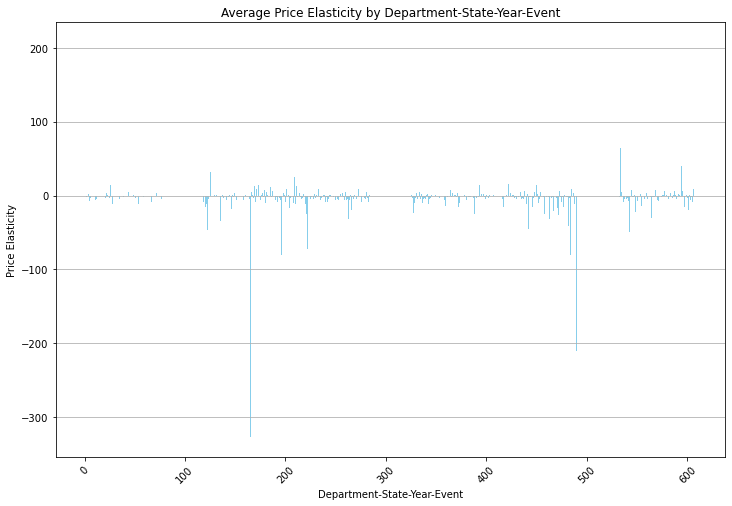

In [143]:
import matplotlib.pyplot as plt

# Plotting price elasticity
plt.figure(figsize=(12, 8))
plt.bar(elasticities_df.index, elasticities_df['price_elasticity'], color='skyblue')
plt.xlabel('Department-State-Year-Event')
plt.ylabel('Price Elasticity')
plt.title('Average Price Elasticity by Department-State-Year-Event')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [144]:
df.columns

Index(['id', 'state_id_x', 'dept_id_x', 'cat_id', 'sell_price', 'revenue',
       'sales_volume', 'date', 'event_type_1', 'avg_price', 'month', 'year_x',
       'quantity_change', 'price_change', 'quantity_sold',
       'revenue_elasticity', 'sales_volume_elasticity', 'elasticity',
       'optimal_price', 'base_price', 'change_in_quantity', 'change_in_price',
       'dept_state', 'price_elasticity', 'dept_id_y', 'state_id_y', 'year_y',
       'event_type'],
      dtype='object')

In [145]:
df['base_price'] = round(df['sell_price']/(1.2),2)

In [146]:
# Calculate total units sold for each unique combination of dept_state, sell_price, and id
df['avg_units_sold'] = df.groupby(['dept_state', 'sell_price', 'id'])['quantity_sold'].transform('mean')

# Calculate the average unit sales at the current price for each dept_state
base_units_sold = df.groupby(['dept_state', 'sell_price'])['avg_units_sold'].mean().reset_index(name='base_units_sold')


In [147]:
base_units_sold[(base_units_sold['dept_state']=='FOODS_1_CA') & (base_units_sold['sell_price']==2.24)]

dept_state  sell_price  base_units_sold
22  FOODS_1_CA        2.24      2292.538462

In [148]:
# Calculate total units sold for each unique combination of dept_state, sell_price, and id
df['avg_units_sold'] = df.groupby(['dept_state', 'sell_price', 'id'])['quantity_sold'].transform('mean')

# Calculate the average unit sales at the current price for each dept_state
base_units_sold = df.groupby(['dept_state', 'sell_price'])['avg_units_sold'].mean().reset_index(name='base_units_sold')

# Round the base_units_sold column to the nearest integer
base_units_sold['base_units_sold'] = base_units_sold['base_units_sold'].round()

# Merge base_units_sold back to the original df
df = df.merge(base_units_sold, on=['dept_state', 'sell_price'], how='left')


In [149]:
df.head()

id state_id_x  dept_id_x   cat_id  sell_price  \
0  HOBBIES_2_036_CA_1_evaluation         CA  HOBBIES_2  HOBBIES        0.97   
1  HOBBIES_2_036_CA_1_evaluation         CA  HOBBIES_2  HOBBIES        0.97   
2  HOBBIES_2_036_CA_1_evaluation         CA  HOBBIES_2  HOBBIES        0.97   
3  HOBBIES_2_036_CA_1_evaluation         CA  HOBBIES_2  HOBBIES        0.97   
4  HOBBIES_2_036_CA_1_evaluation         CA  HOBBIES_2  HOBBIES        0.97   

   revenue  sales_volume       date event_type_1  avg_price  ...  \
0  1356.06          1398 2011-01-29     No Event   2.624383  ...   
1  1356.06          1398 2011-01-29     No Event   2.624383  ...   
2  1356.06          1398 2011-01-29     No Event   2.624383  ...   
3  1356.06          1398 2011-01-29     No Event   2.624383  ...   
4  1356.06          1398 2011-01-29     No Event   2.624383  ...   

   change_in_quantity  change_in_price    dept_state  price_elasticity  \
0                 NaN              NaN  HOBBIES_2_CA         -4.269155   
1                 NaN              NaN  HOBBIES_2_CA         -2.842887   
2                 NaN              NaN  HOBBIES_2_CA          1.230363   
3                 NaN              NaN  HOBBIES_2_CA               NaN   
4                 NaN              NaN  HOBBIES_2_CA               NaN   

   dept_id_y  state_id_y  year_y  event_type  avg_units_sold  base_units_sold  
0  HOBBIES_2          CA    2011    Cultural          1398.0            389.0  
1  HOBBIES_2          CA    2011    National          1398.0            389.0  
2  HOBBIES_2          CA    2011    No Event          1398.0            389.0  
3  HOBBIES_2          CA    2011   Religious          1398.0            389.0  
4  HOBBIES_2          CA    2011    Sporting          1398.0            389.0  

[5 rows x 30 columns]

In [152]:
df["LB_price"] = df["sell_price"] - (0.2*df["sell_price"])
df["UB_price"] = df["sell_price"] + (0.2*df["sell_price"])

In [174]:
from scipy.optimize import minimize

# Define the objective function to be minimized
def objective(opti_price):
    df["opti_price"] = opti_price[0]
    df["optimized_units"] = df["base_units_sold"] + (df["base_units_sold"]*((df["opti_price"]/df["sell_price"]) - 1)* (df["price_elasticity"]))
    df["optimized_revenue"] = df["optimized_units"] * df["opti_price"]
    return -df["optimized_revenue"].sum()

# Define the initial guess as a list
opti_price = df["sell_price"].iloc[3]  # Use iloc[0] to get the first value in the "sell_price" column

# Define the bounds for the variables
bounds = [(df["LB_price"].iloc[3], df["UB_price"].iloc[3])]

# Use the optimization algorithm to minimize the objective function
result = minimize(objective, opti_price, bounds=bounds)

# Print the optimization result
print(result.x)


[0.81817203]


In [154]:
bounds = [(df["LB_price"].iloc[3], df["UB_price"].iloc[3])]

In [164]:
df["sell_price"].iloc[3]

0.97

In [156]:
len(df["sell_price"])

2526467

In [239]:
import pandas as pd

# Create bounds for each row
bounds_list = []
for index, row in df.iterrows():
    lower_bound = row['LB_price']
    upper_bound = row['UB_price']
    bounds_list.append((lower_bound, upper_bound))

df['bound'] = bounds_list


In [158]:
df_2011_1 = df[(df['year_x']==2011) & (df['month']==1)]

In [222]:
df_2011_2 = df[(df['year_x']==2011) & (df['month']==2)]

In [223]:
df_2011_2

id state_id_x    dept_id_x     cat_id  \
2516     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2517     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2518     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2519     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2520     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
...                                ...        ...          ...        ...   
21470  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21471  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21472  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21473  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21474  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   

       sell_price  revenue  sales_volume       date event_type_1  avg_price  \
2516         1.00   704.00           704 2011-02-01     No Event   2.624383   
2517         1.00   704.00           704 2011-02-01     No Event   2.624383   
2518         1.00   704.00           704 2011-02-01     No Event   2.624383   
2519         1.00   704.00           704 2011-02-01     No Event   2.624383   
2520         1.00   704.00           704 2011-02-01     No Event   2.624383   
...           ...      ...           ...        ...          ...        ...   
21470        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21471        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21472        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21473        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21474        3.67  1842.34           502 2011-02-28     No Event   5.774333   

       ...  year_y  event_type  avg_units_sold  base_units_sold  LB_price  \
2516   ...    2011    Cultural           704.0            562.0     0.800   
2517   ...    2011    National           704.0            562.0     0.800   
2518   ...    2011    No Event           704.0            562.0     0.800   
2519   ...    2011   Religious           704.0            562.0     0.800   
2520   ...    2011    Sporting           704.0            562.0     0.800   
...    ...     ...         ...             ...              ...       ...   
21470  ...    2016    Cultural           502.0            948.0     2.936   
21471  ...    2016    National           502.0            948.0     2.936   
21472  ...    2016    No Event           502.0            948.0     2.936   
21473  ...    2016   Religious           502.0            948.0     2.936   
21474  ...    2016    Sporting           502.0            948.0     2.936   

       UB_price  opti_price  optimized_units  optimized_revenue  \
2516      1.200    0.818172       690.729552         565.135609   
2517      1.200    0.818172       908.054967         742.945189   
2518      1.200    0.818172       423.424149         346.433802   
2519      1.200    0.818172              NaN                NaN   
2520      1.200    0.818172              NaN                NaN   
...         ...         ...              ...                ...   
21470     4.404    0.818172      1965.577686        1608.180714   
21471     4.404    0.818172       202.955269         166.052328   
21472     4.404    0.818172       572.970883         468.788759   
21473     4.404    0.818172     -3656.207855       -2991.407056   
21474     4.404    0.818172              NaN                NaN   

                bound  
2516       (0.8, 1.2)  
2517       (0.8, 1.2)  
2518       (0.8, 1.2)  
2519       (0.8, 1.2)  
2520       (0.8, 1.2)  
...               ...  
21470  (2.936, 4.404)  
21471  (2.936, 4.404)  
21472  (2.936, 4.404)  
21473  (2.936, 4.404)  
21474  (2.936, 4.404)  

[18959 rows x 36 columns]

In [240]:
dfs = {}
for (i, j), group_df in df.groupby(['year_x', 'month']):
    dfs[f"df_{i}_{j}"] = group_df.copy()


In [230]:
len(dfs['df_2011_2'])

18959

In [233]:
from scipy.optimize import minimize

res = []
for i in range(len(dfs['df_2011_2'])):
    # Define the objective function to be minimized
    def objective(opti_price):
        dfs['df_2011_2'].loc[i, "opti_price"] = opti_price
        dfs['df_2011_2'].loc[i, "optimized_units"] = dfs['df_2011_2'].loc[i, "base_units_sold"] + (dfs['df_2011_2'].loc[i, "base_units_sold"]*((dfs['df_2011_2'].loc[i, "opti_price"]/dfs['df_2011_2'].loc[i, "sell_price"]) - 1)* (dfs['df_2011_2'].loc[i, "price_elasticity"]))
        dfs['df_2011_2'].loc[i, "optimized_revenue"] = dfs['df_2011_2'].loc[i, "optimized_units"] * dfs['df_2011_2'].loc[i, "opti_price"]
        return -dfs['df_2011_2'].loc[i, "optimized_revenue"]

    # Define the initial guess as a list
    opti_price = dfs['df_2011_2']["sell_price"].iloc[i]

    # Define the bounds for the variables as a list of tuples
    bounds = [(dfs['df_2011_2']['LB_price'].iloc[i], dfs['df_2011_2']['UB_price'].iloc[i])]

    # Use the optimization algorithm to minimize the objective function
    result = minimize(objective, opti_price, bounds=bounds)
    res.append(result.x[0])

In [235]:
len(res)

21475

In [241]:
from scipy.optimize import minimize

res = []
for index, row in dfs['df_2011_2'].iterrows():
    # Define the objective function to be minimized
    def objective(opti_price):
        row["opti_price"] = opti_price
        row["optimized_units"] = row["base_units_sold"] + (row["base_units_sold"]*((row["opti_price"]/row["sell_price"]) - 1)* (row["price_elasticity"]))
        row["optimized_revenue"] = row["optimized_units"] * row["opti_price"]
        return -row["optimized_revenue"]

    # Define the initial guess as a list
    opti_price = row["sell_price"]

    # Define the bounds for the variables as a list of tuples
    bounds = [(row['LB_price'], row['UB_price'])]

    # Use the optimization algorithm to minimize the objective function
    result = minimize(objective, opti_price, bounds=bounds)
    res.append(result.x[0])


In [244]:
dfs['df_2011_2']['optimized_price'] = res

In [245]:
dfs['df_2011_2']

id state_id_x    dept_id_x     cat_id  \
2516     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2517     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2518     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2519     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
2520     HOBBIES_2_032_WI_1_evaluation         WI    HOBBIES_2    HOBBIES   
...                                ...        ...          ...        ...   
21470  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21471  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21472  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21473  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   
21474  HOUSEHOLD_2_288_TX_3_evaluation         TX  HOUSEHOLD_2  HOUSEHOLD   

       sell_price  revenue  sales_volume       date event_type_1  avg_price  \
2516         1.00   704.00           704 2011-02-01     No Event   2.624383   
2517         1.00   704.00           704 2011-02-01     No Event   2.624383   
2518         1.00   704.00           704 2011-02-01     No Event   2.624383   
2519         1.00   704.00           704 2011-02-01     No Event   2.624383   
2520         1.00   704.00           704 2011-02-01     No Event   2.624383   
...           ...      ...           ...        ...          ...        ...   
21470        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21471        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21472        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21473        3.67  1842.34           502 2011-02-28     No Event   5.774333   
21474        3.67  1842.34           502 2011-02-28     No Event   5.774333   

       ...  event_type  avg_units_sold  base_units_sold  LB_price  UB_price  \
2516   ...    Cultural           704.0            562.0     0.800     1.200   
2517   ...    National           704.0            562.0     0.800     1.200   
2518   ...    No Event           704.0            562.0     0.800     1.200   
2519   ...   Religious           704.0            562.0     0.800     1.200   
2520   ...    Sporting           704.0            562.0     0.800     1.200   
...    ...         ...             ...              ...       ...       ...   
21470  ...    Cultural           502.0            948.0     2.936     4.404   
21471  ...    National           502.0            948.0     2.936     4.404   
21472  ...    No Event           502.0            948.0     2.936     4.404   
21473  ...   Religious           502.0            948.0     2.936     4.404   
21474  ...    Sporting           502.0            948.0     2.936     4.404   

       opti_price  optimized_units  optimized_revenue           bound  \
2516     0.818172       690.729552         565.135609      (0.8, 1.2)   
2517     0.818172       908.054967         742.945189      (0.8, 1.2)   
2518     0.818172       423.424149         346.433802      (0.8, 1.2)   
2519     0.818172              NaN                NaN      (0.8, 1.2)   
2520     0.818172              NaN                NaN      (0.8, 1.2)   
...           ...              ...                ...             ...   
21470    0.818172      1965.577686        1608.180714  (2.936, 4.404)   
21471    0.818172       202.955269         166.052328  (2.936, 4.404)   
21472    0.818172       572.970883         468.788759  (2.936, 4.404)   
21473    0.818172     -3656.207855       -2991.407056  (2.936, 4.404)   
21474    0.818172              NaN                NaN  (2.936, 4.404)   

       optimized_price  
2516          0.896907  
2517          0.800000  
2518          1.200000  
2519          1.000000  
2520          1.000000  
...                ...  
21470         3.163416  
21471         4.404000  
21472         4.404000  
21473         4.404000  
21474         3.670000  

[18959 rows x 37 columns]